Industry & Inheritence 

In [105]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import sklearn
assert sklearn.__version__ >= ".20"
from sklearn import datasets
from sklearn import metrics

# Industry Analysis 

In [106]:
def addLabelsH(chartUsed):
    for rect in chartUsed.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The Height of the bar is also not pixels, it's the count. So we can use it as the label!
        label_text = width

        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2
        chartUsed.text(label_x, label_y, label_text, ha='center', va='center')


In [107]:
df = pd.read_csv("Billionaires Statistics Dataset.csv") 
df.sort_values('finalWorth',ascending=False)
df['selfMade'] = df['selfMade'].replace({True: 1, False: 0})


In [108]:
Industries = df[['personName','industries']]
Industries

personName             industries
0     Bernard Arnault & family       Fashion & Retail
1                    Elon Musk             Automotive
2                   Jeff Bezos             Technology
3                Larry Ellison             Technology
4               Warren Buffett  Finance & Investments
...                        ...                    ...
2635                   Yu Rong             Healthcare
2636    Richard Yuengling, Jr.        Food & Beverage
2637             Zhang Gongyun          Manufacturing
2638    Zhang Guiping & family            Real Estate
2639               Inigo Zobel            Diversified

[2640 rows x 2 columns]

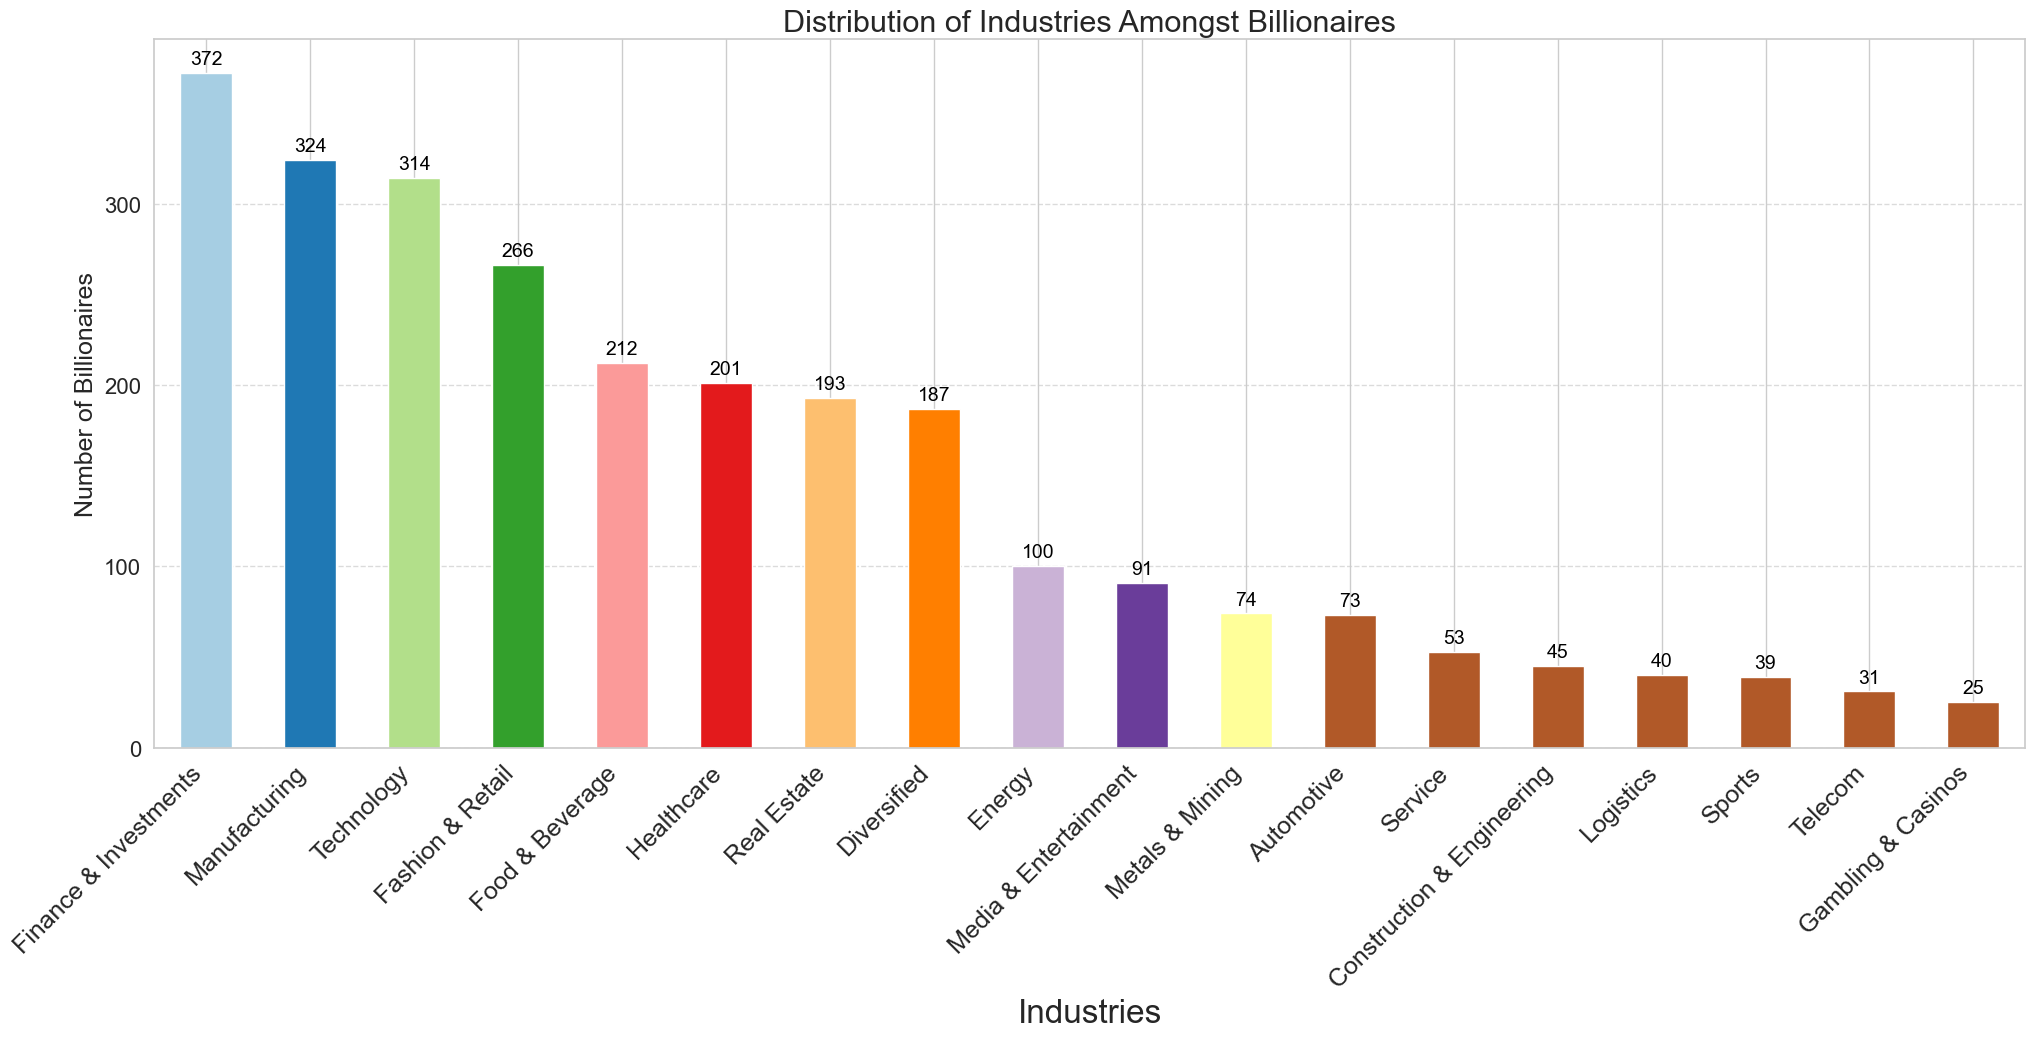

In [109]:
# Color palette
colors = plt.cm.Paired(range(len(Industries['industries'].unique())))

# Plotting
Ind_Dist = Industries['industries'].value_counts().sort_values(ascending=False).plot.bar(figsize=(22,12), color=colors)

# Function to add labels to vertical bars
def addLabelsV(ax, fontsize=14):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=fontsize, color='black', xytext=(0, 10),
                    textcoords='offset points')

addLabelsV(Ind_Dist, fontsize=14)

# Adjusting font sizes and other aesthetics
plt.ylabel('Number of Billionaires', fontsize=18)
plt.xlabel('Industries', fontsize=24)
plt.title("Distribution of Industries Amongst Billionaires", fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(fontsize=18, rotation=45, ha='right')  # Adjusting the rotation and alignment of x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()




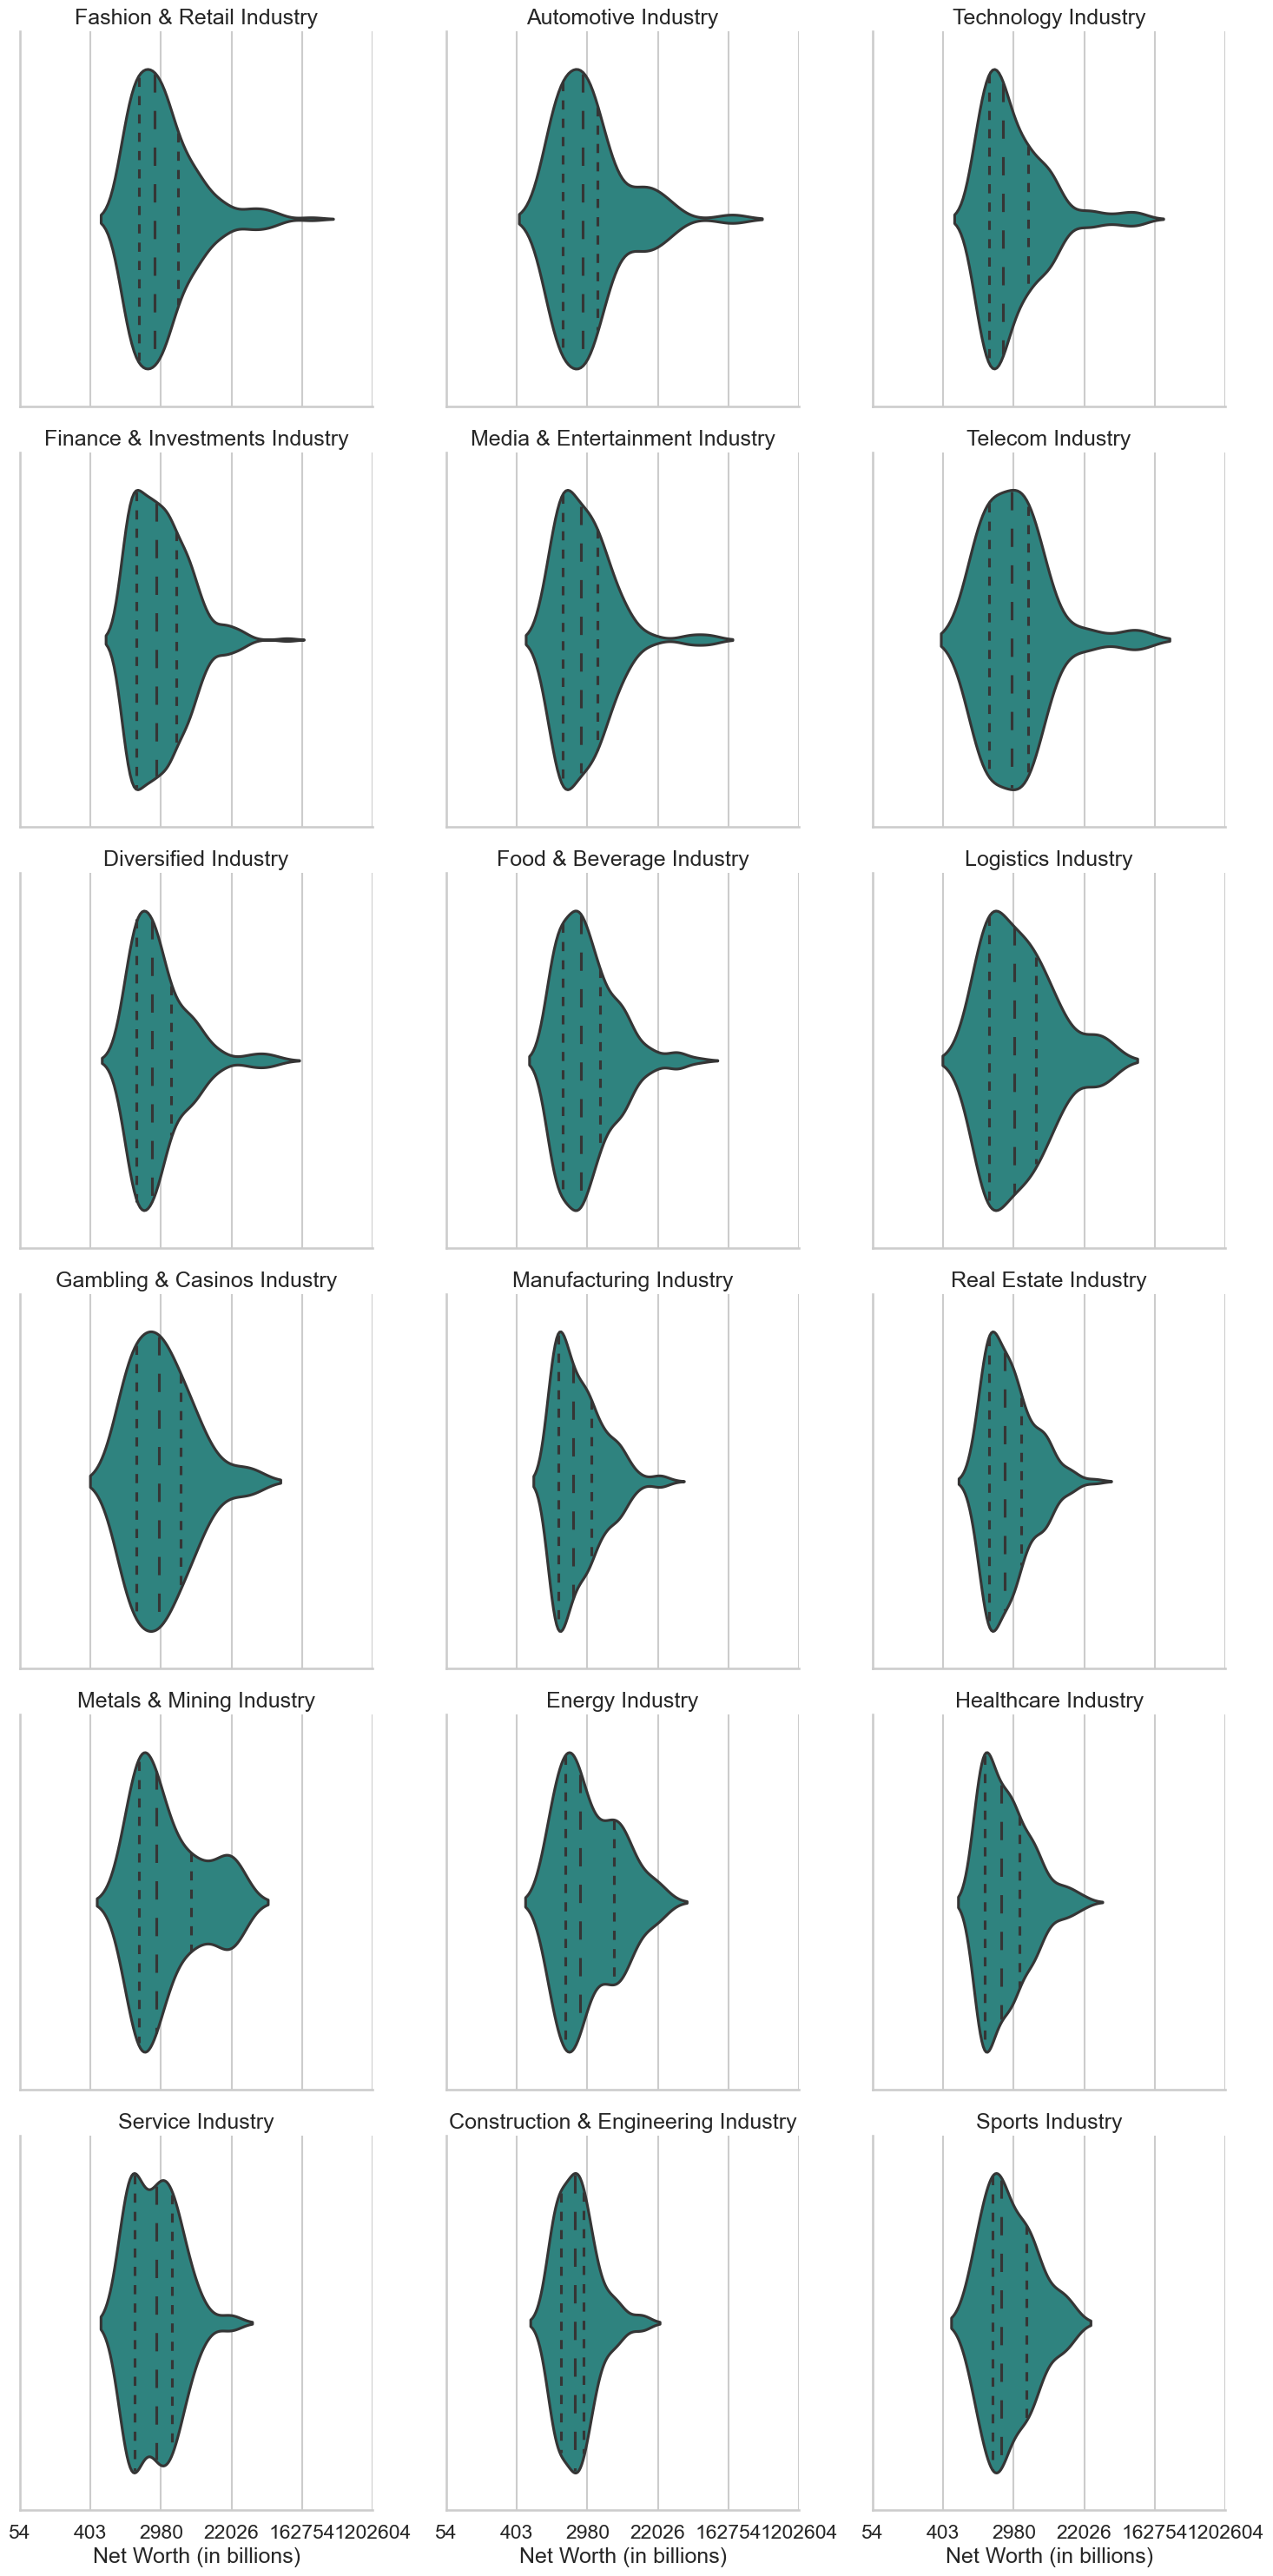

In [110]:
# Set style and context for the plot
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)

# Create a new column for the log-transformed values of finalWorth
df['log_finalWorth'] = np.log(df['finalWorth'])

# Define a function for the violin plot so we can use it with FacetGrid
def violin(x, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    sns.violinplot(x=x, data=data, ax=ax, inner="quart", palette="viridis",figsize=(20,30))
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(np.exp(ax.get_xticks()).astype(int))  # Convert back from log scale for labeling

# Create FacetGrid
g = sns.FacetGrid(df, col="industries", col_wrap=3, height=5, sharex=True, sharey=False)
g = g.map_dataframe(violin, x='log_finalWorth')

# Set titles and labels
g.set_axis_labels('Net Worth (in billions)', '')
g.set_titles("{col_name} Industry")

# Adjust layout and display
plt.tight_layout()
plt.show()


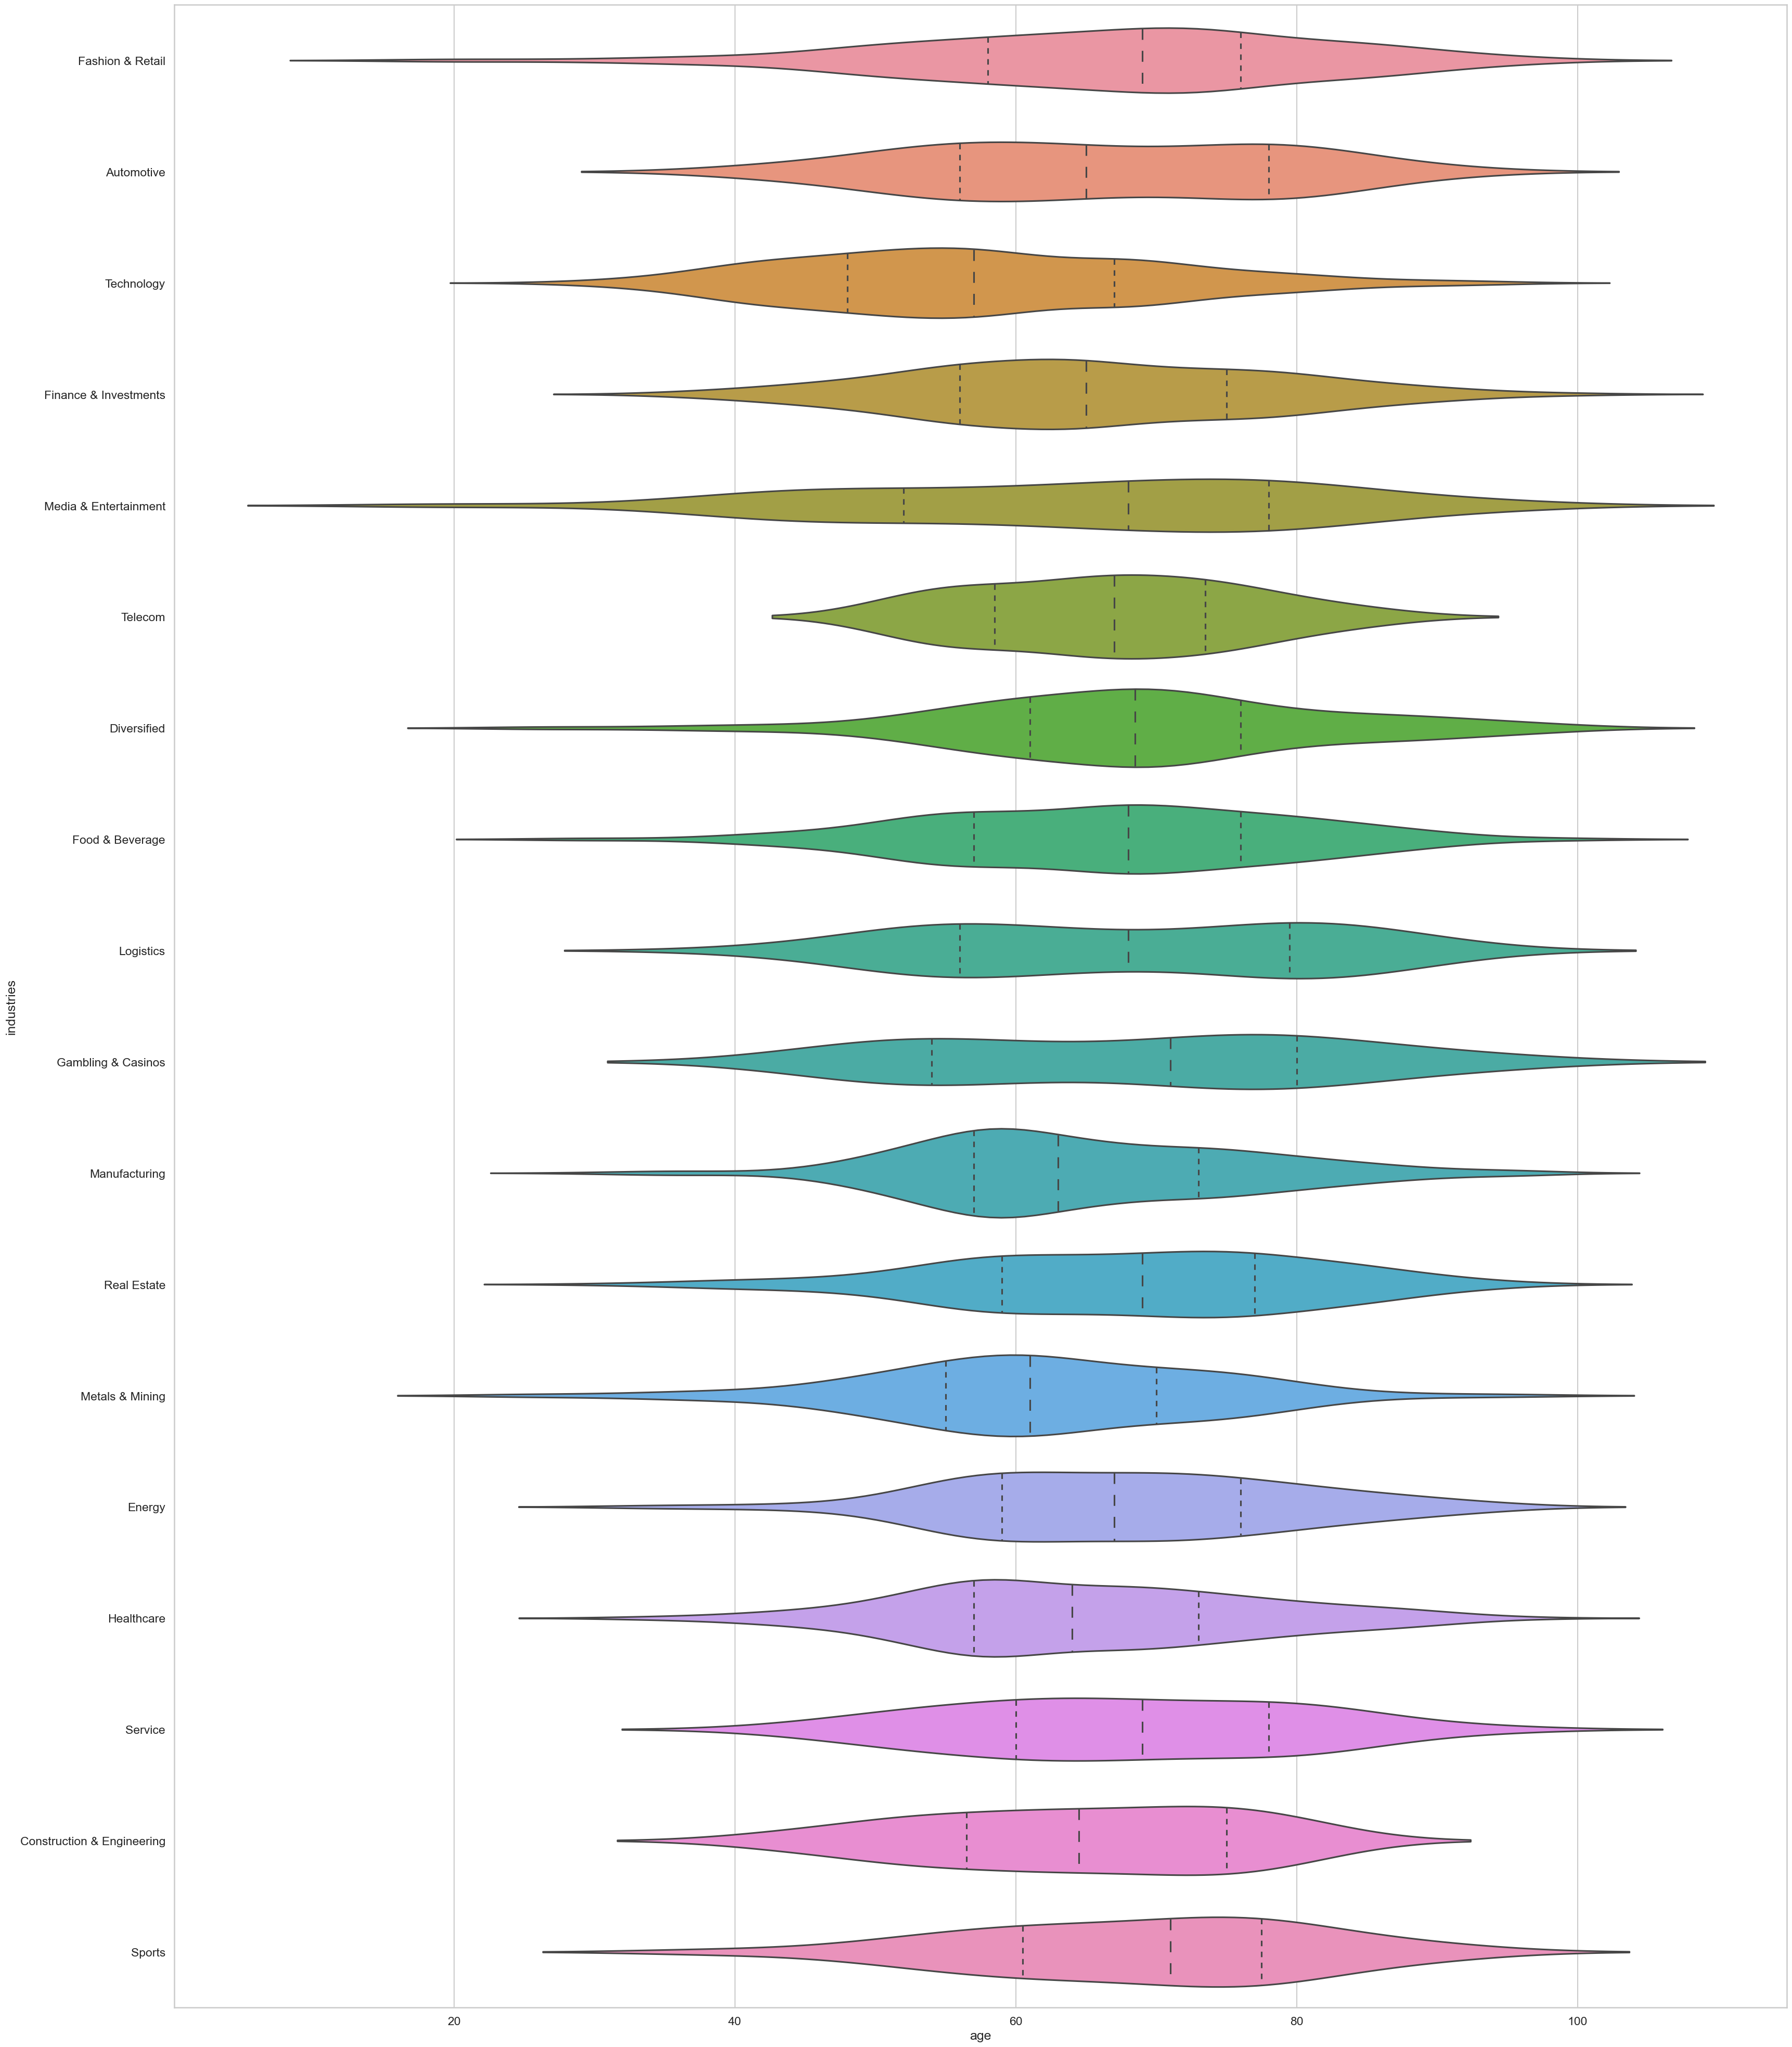

In [111]:
plt.figure(figsize=(40,50))
with sns.axes_style("whitegrid"):
    sns.violinplot(x='age', y='industries', data=df, inner="quart",log_scale=(10,100))
    sns.set(font_scale=5) 
    plt.show()

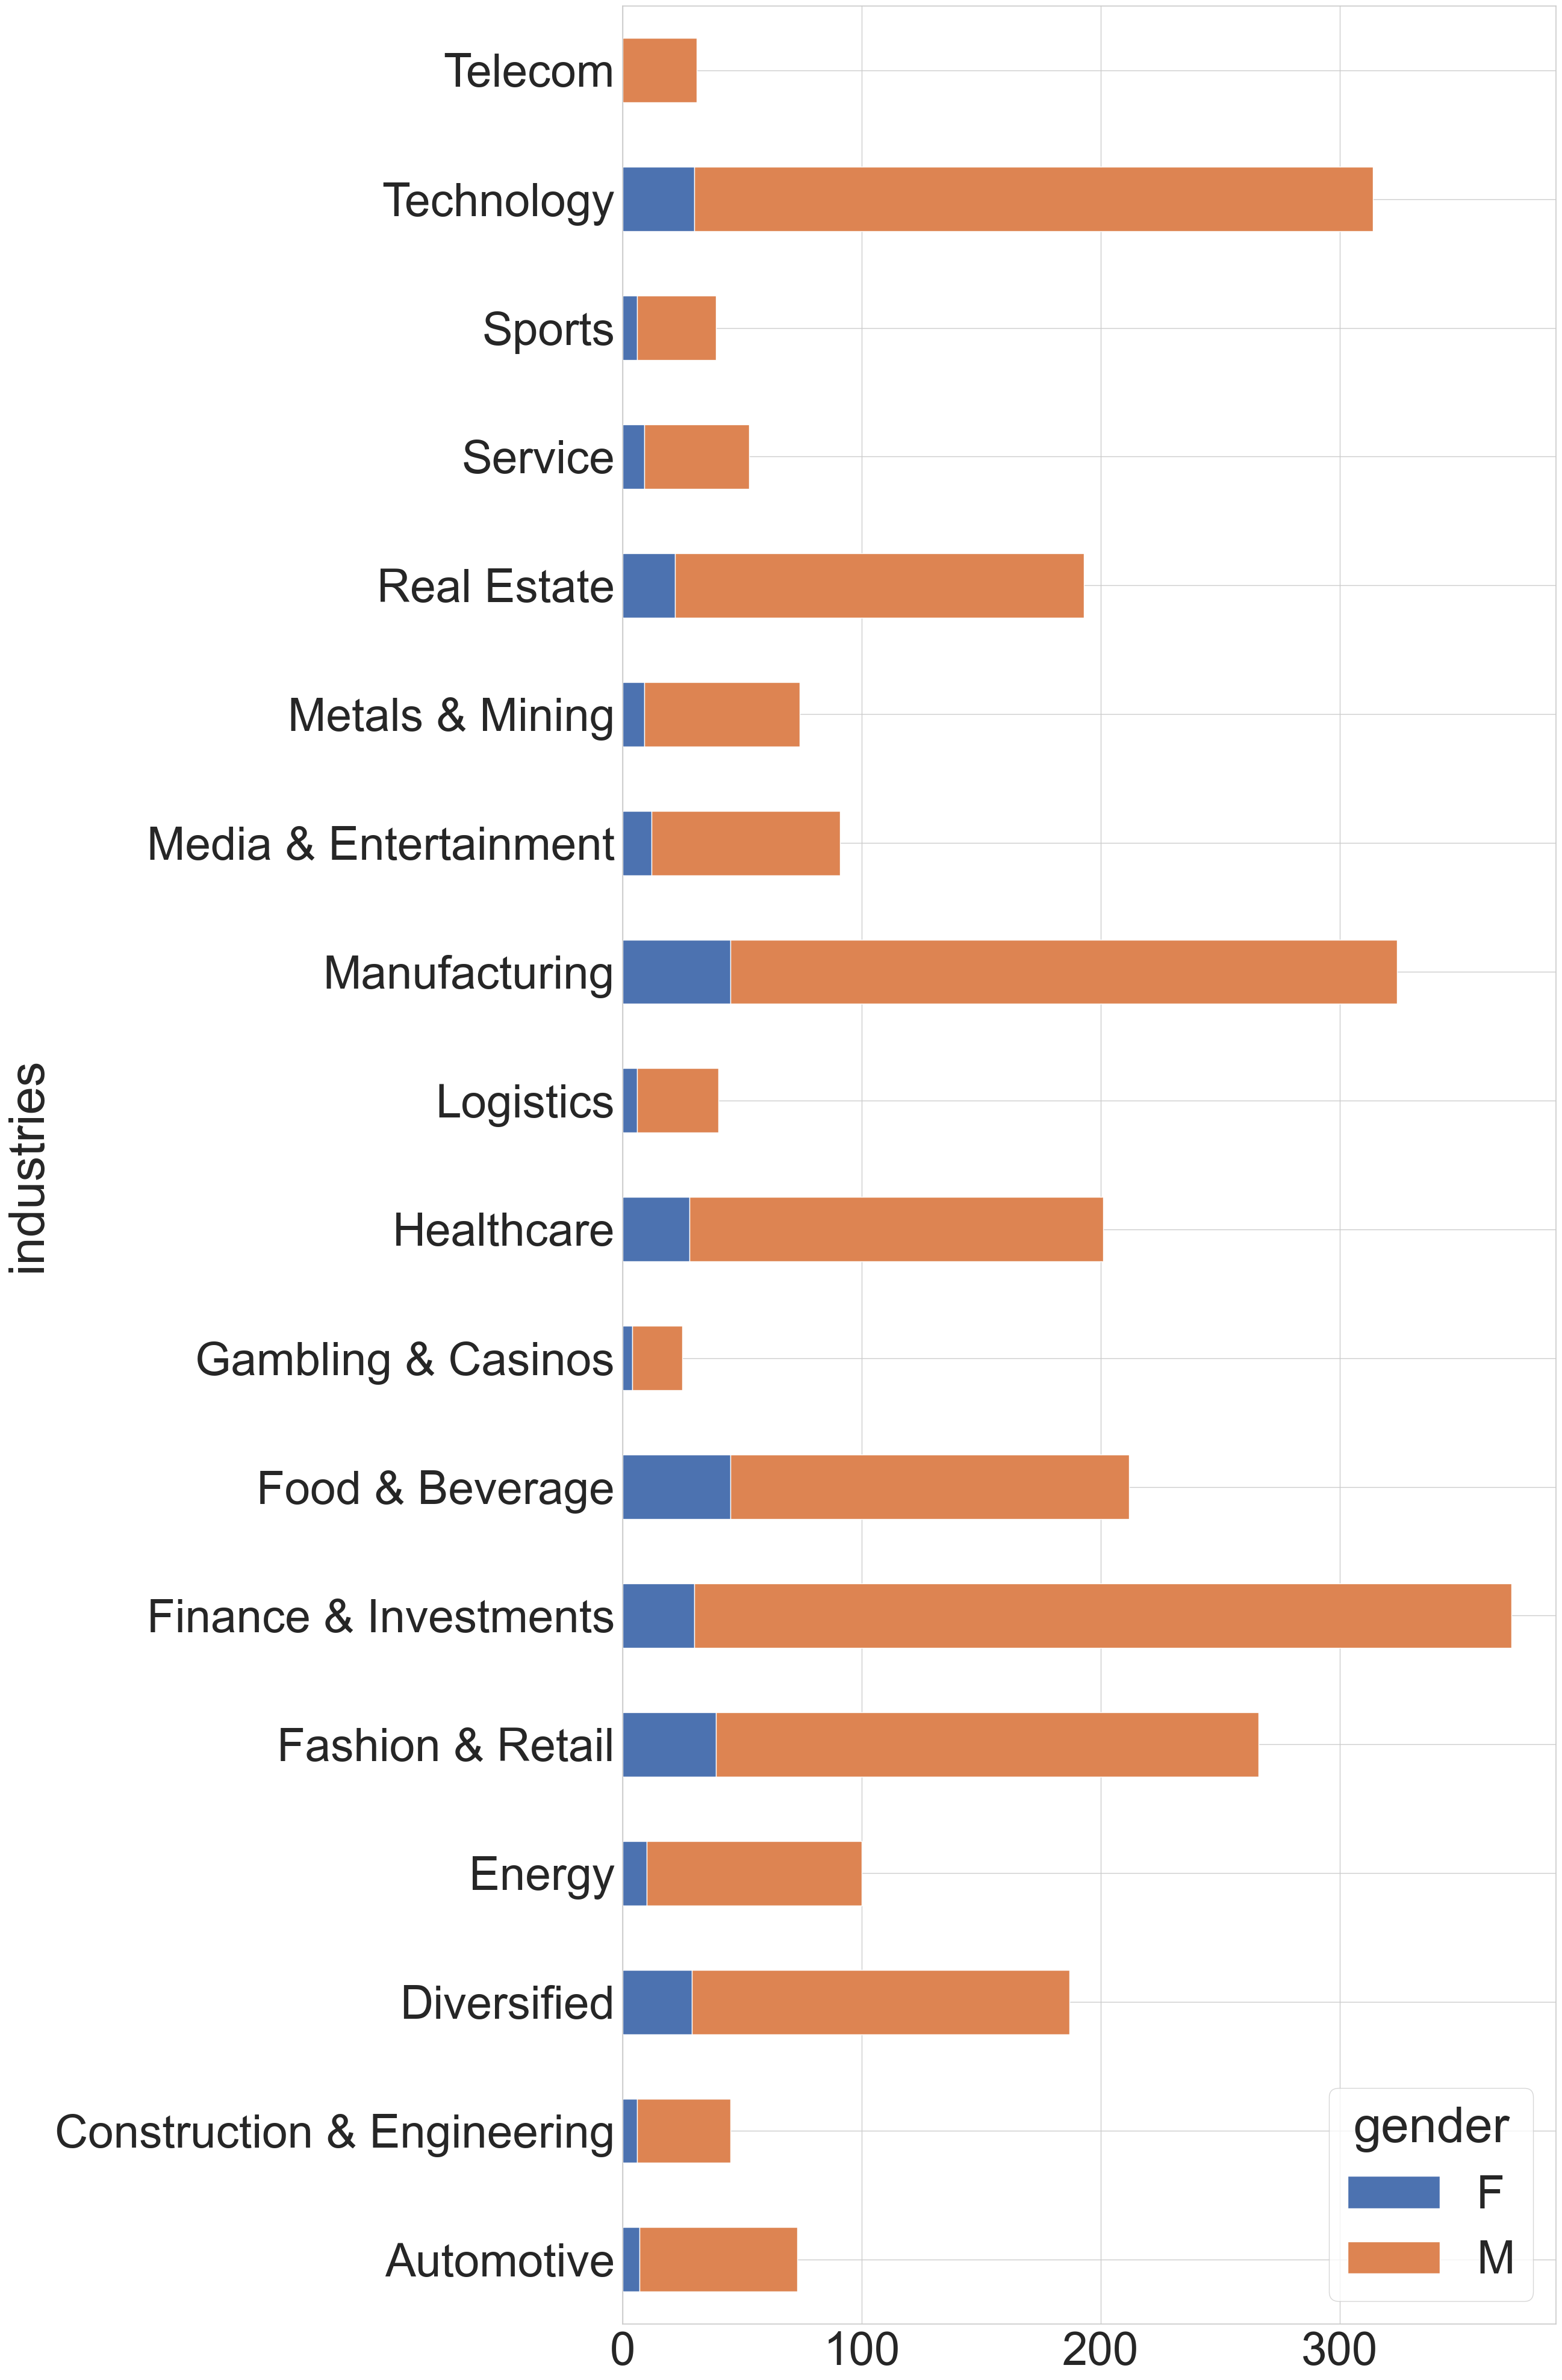

In [112]:
# Save the chart that's drawn
testChart = df.groupby(['industries','gender']).size().unstack().plot(kind='barh', stacked=True,figsize=(20, 50))                                                                                                                                                                       
plt.show()

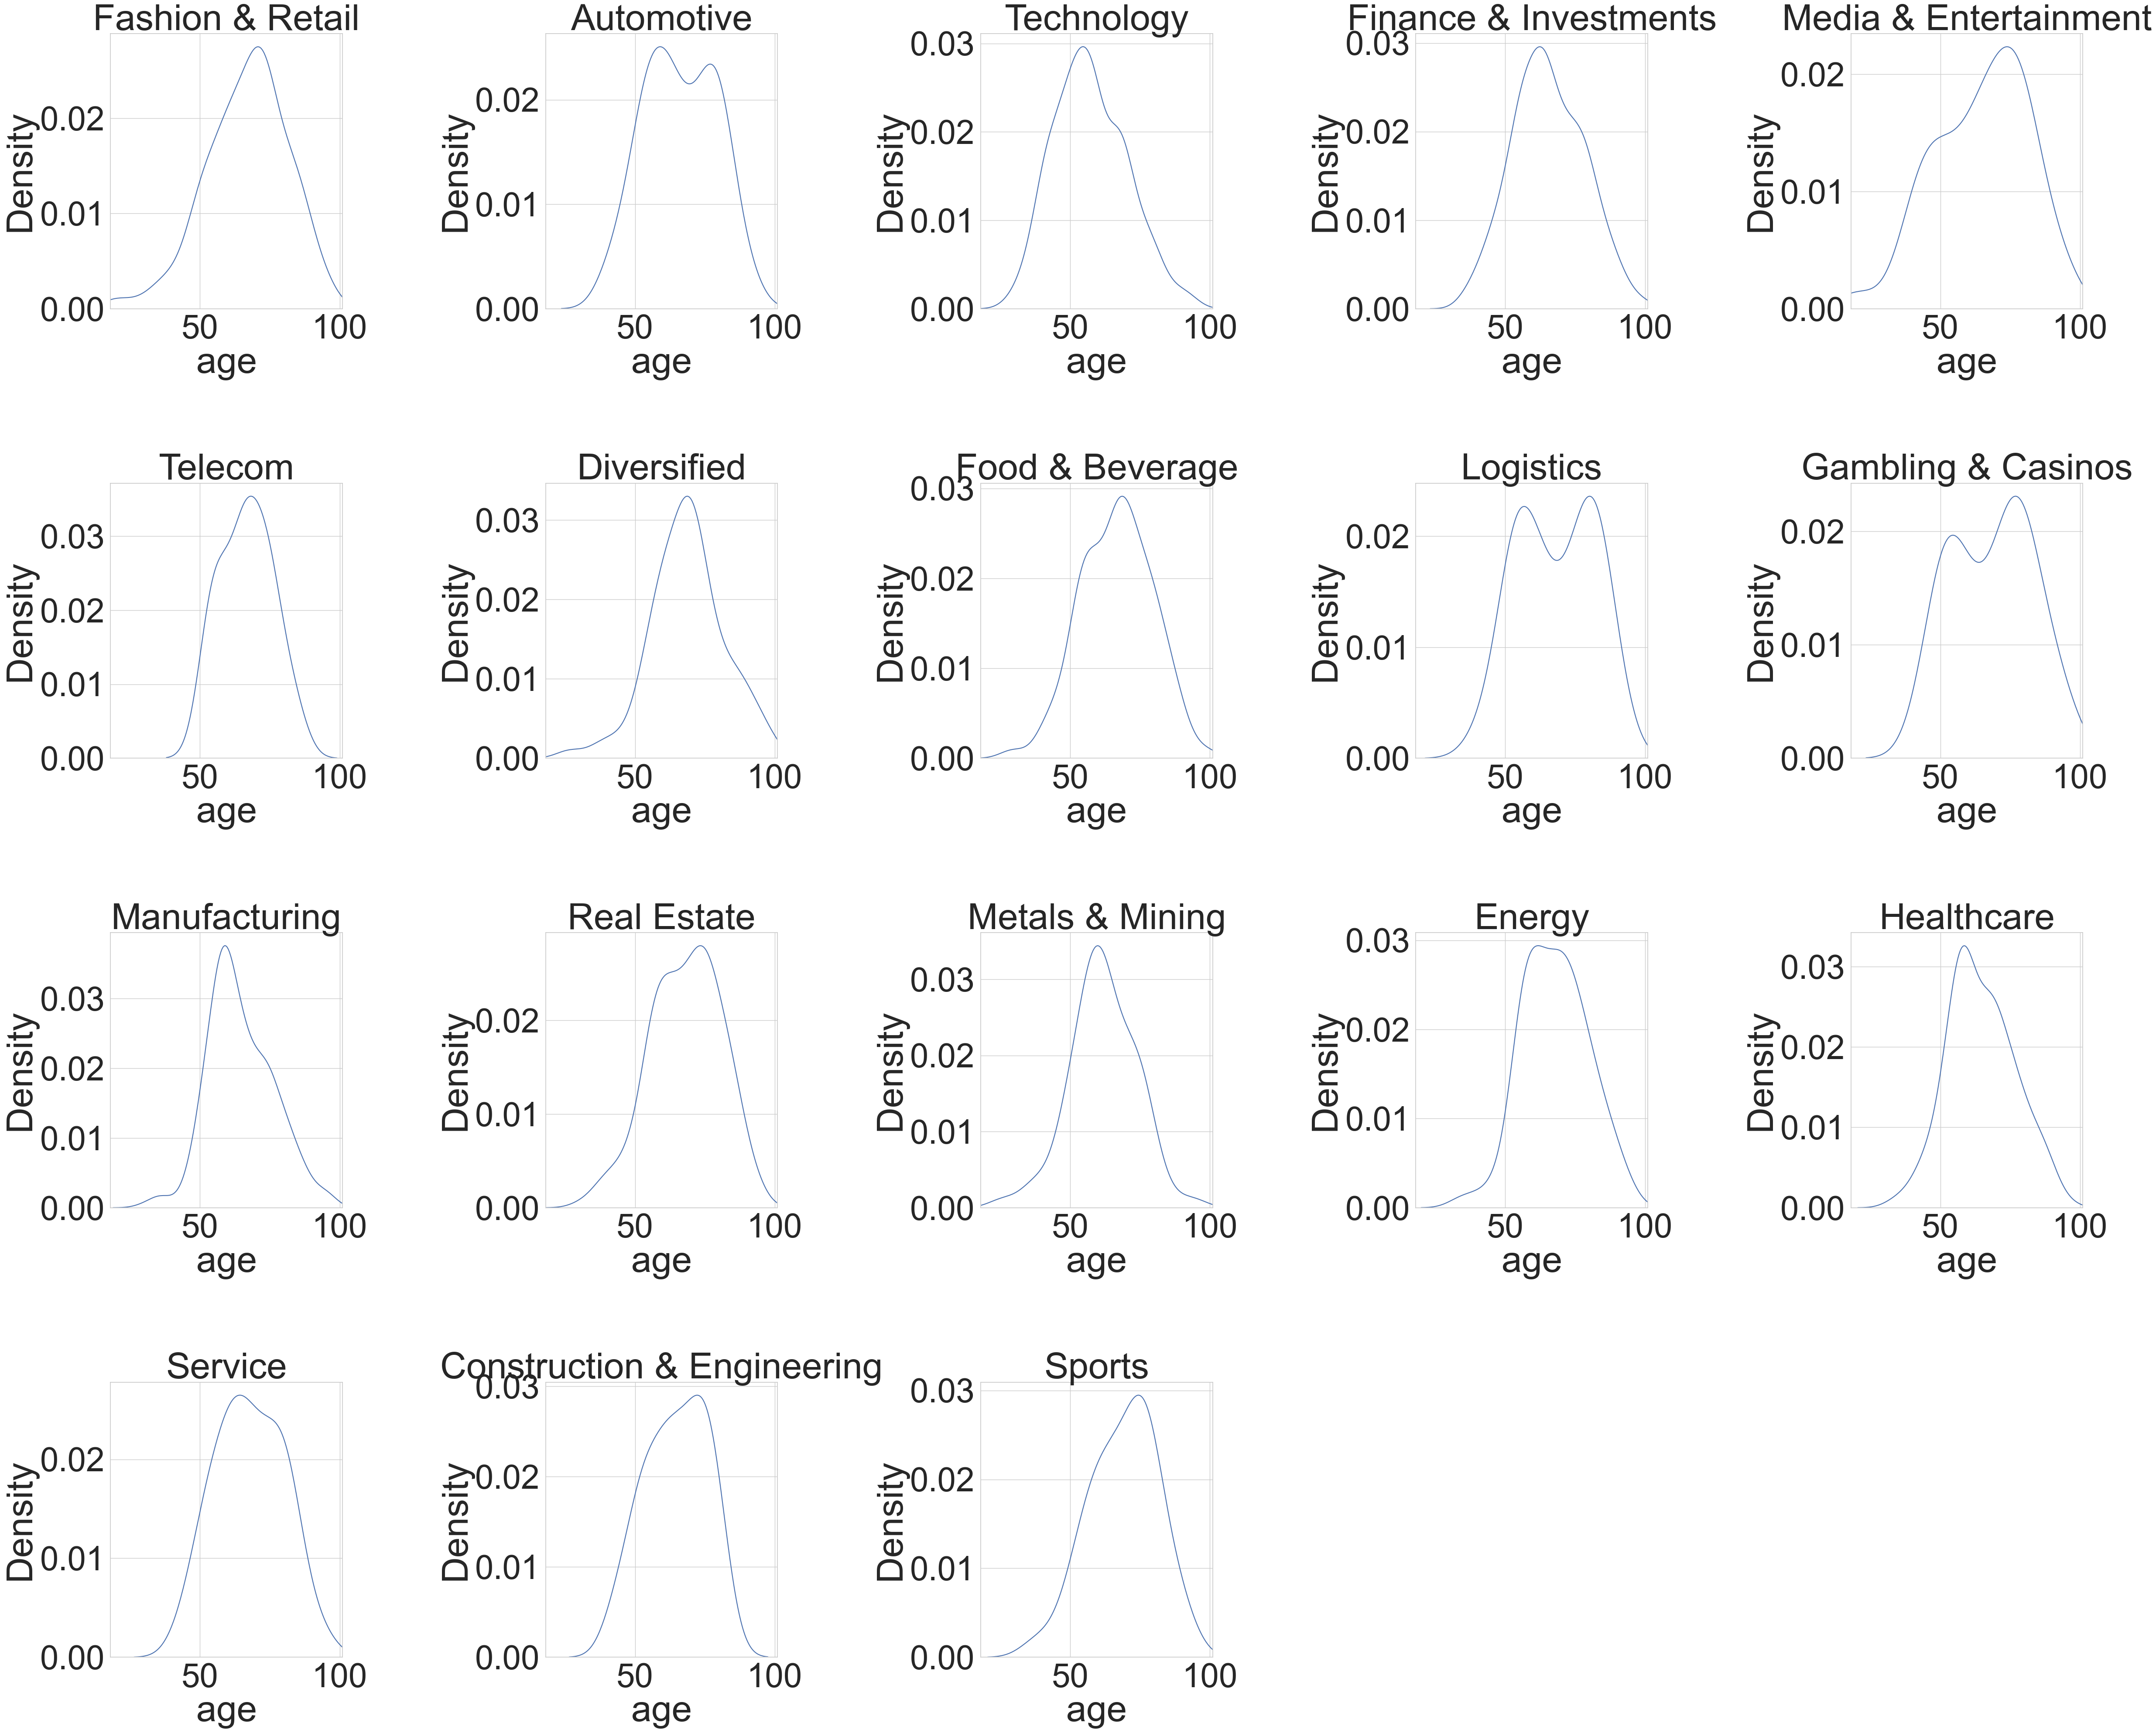

In [113]:
# Get unique industry categories
unique_industries = df['industries'].unique()

# Define the number of rows and columns for the subplot grid
num_rows = 5
num_cols = 5
num_plots = min(len(unique_industries), num_rows * num_cols)

# Create a grid of subplots with some spacing
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 50))

# Iterate over unique industries and create KDE plots in the grid
for i in range(num_plots):
    row, col = i // num_cols, i % num_cols
    industry = unique_industries[i]
    ax = axes[row, col]
    sns.kdeplot(data=df[df['industries'] == industry]['age'], ax=ax)
    ax.set_title(industry)
    ax.set_xlim(df['age'].min(), df['age'].max())

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    row, col = i // num_cols, i % num_cols
    fig.delaxes(axes[row, col])

# Adjust layout and add some spacing
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

# Inheritence Analysis 

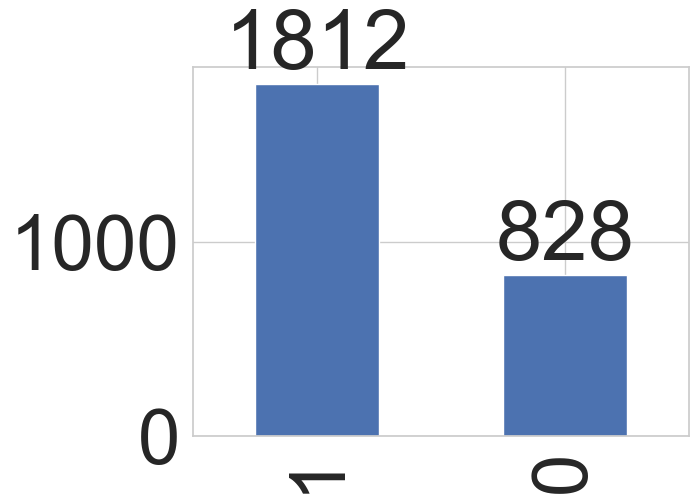

In [114]:

# Replace 'True' with 1 and 'False' with 0
Inher = df[['selfMade', 'status']]

# Count the number of self-made and not self-made billionaires
value_counts = Inher['selfMade'].value_counts()

# Create the bar plot
Inher_selfM = value_counts.plot.bar()

# Add labels to the bars
for i in Inher_selfM.patches:
    Inher_selfM.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

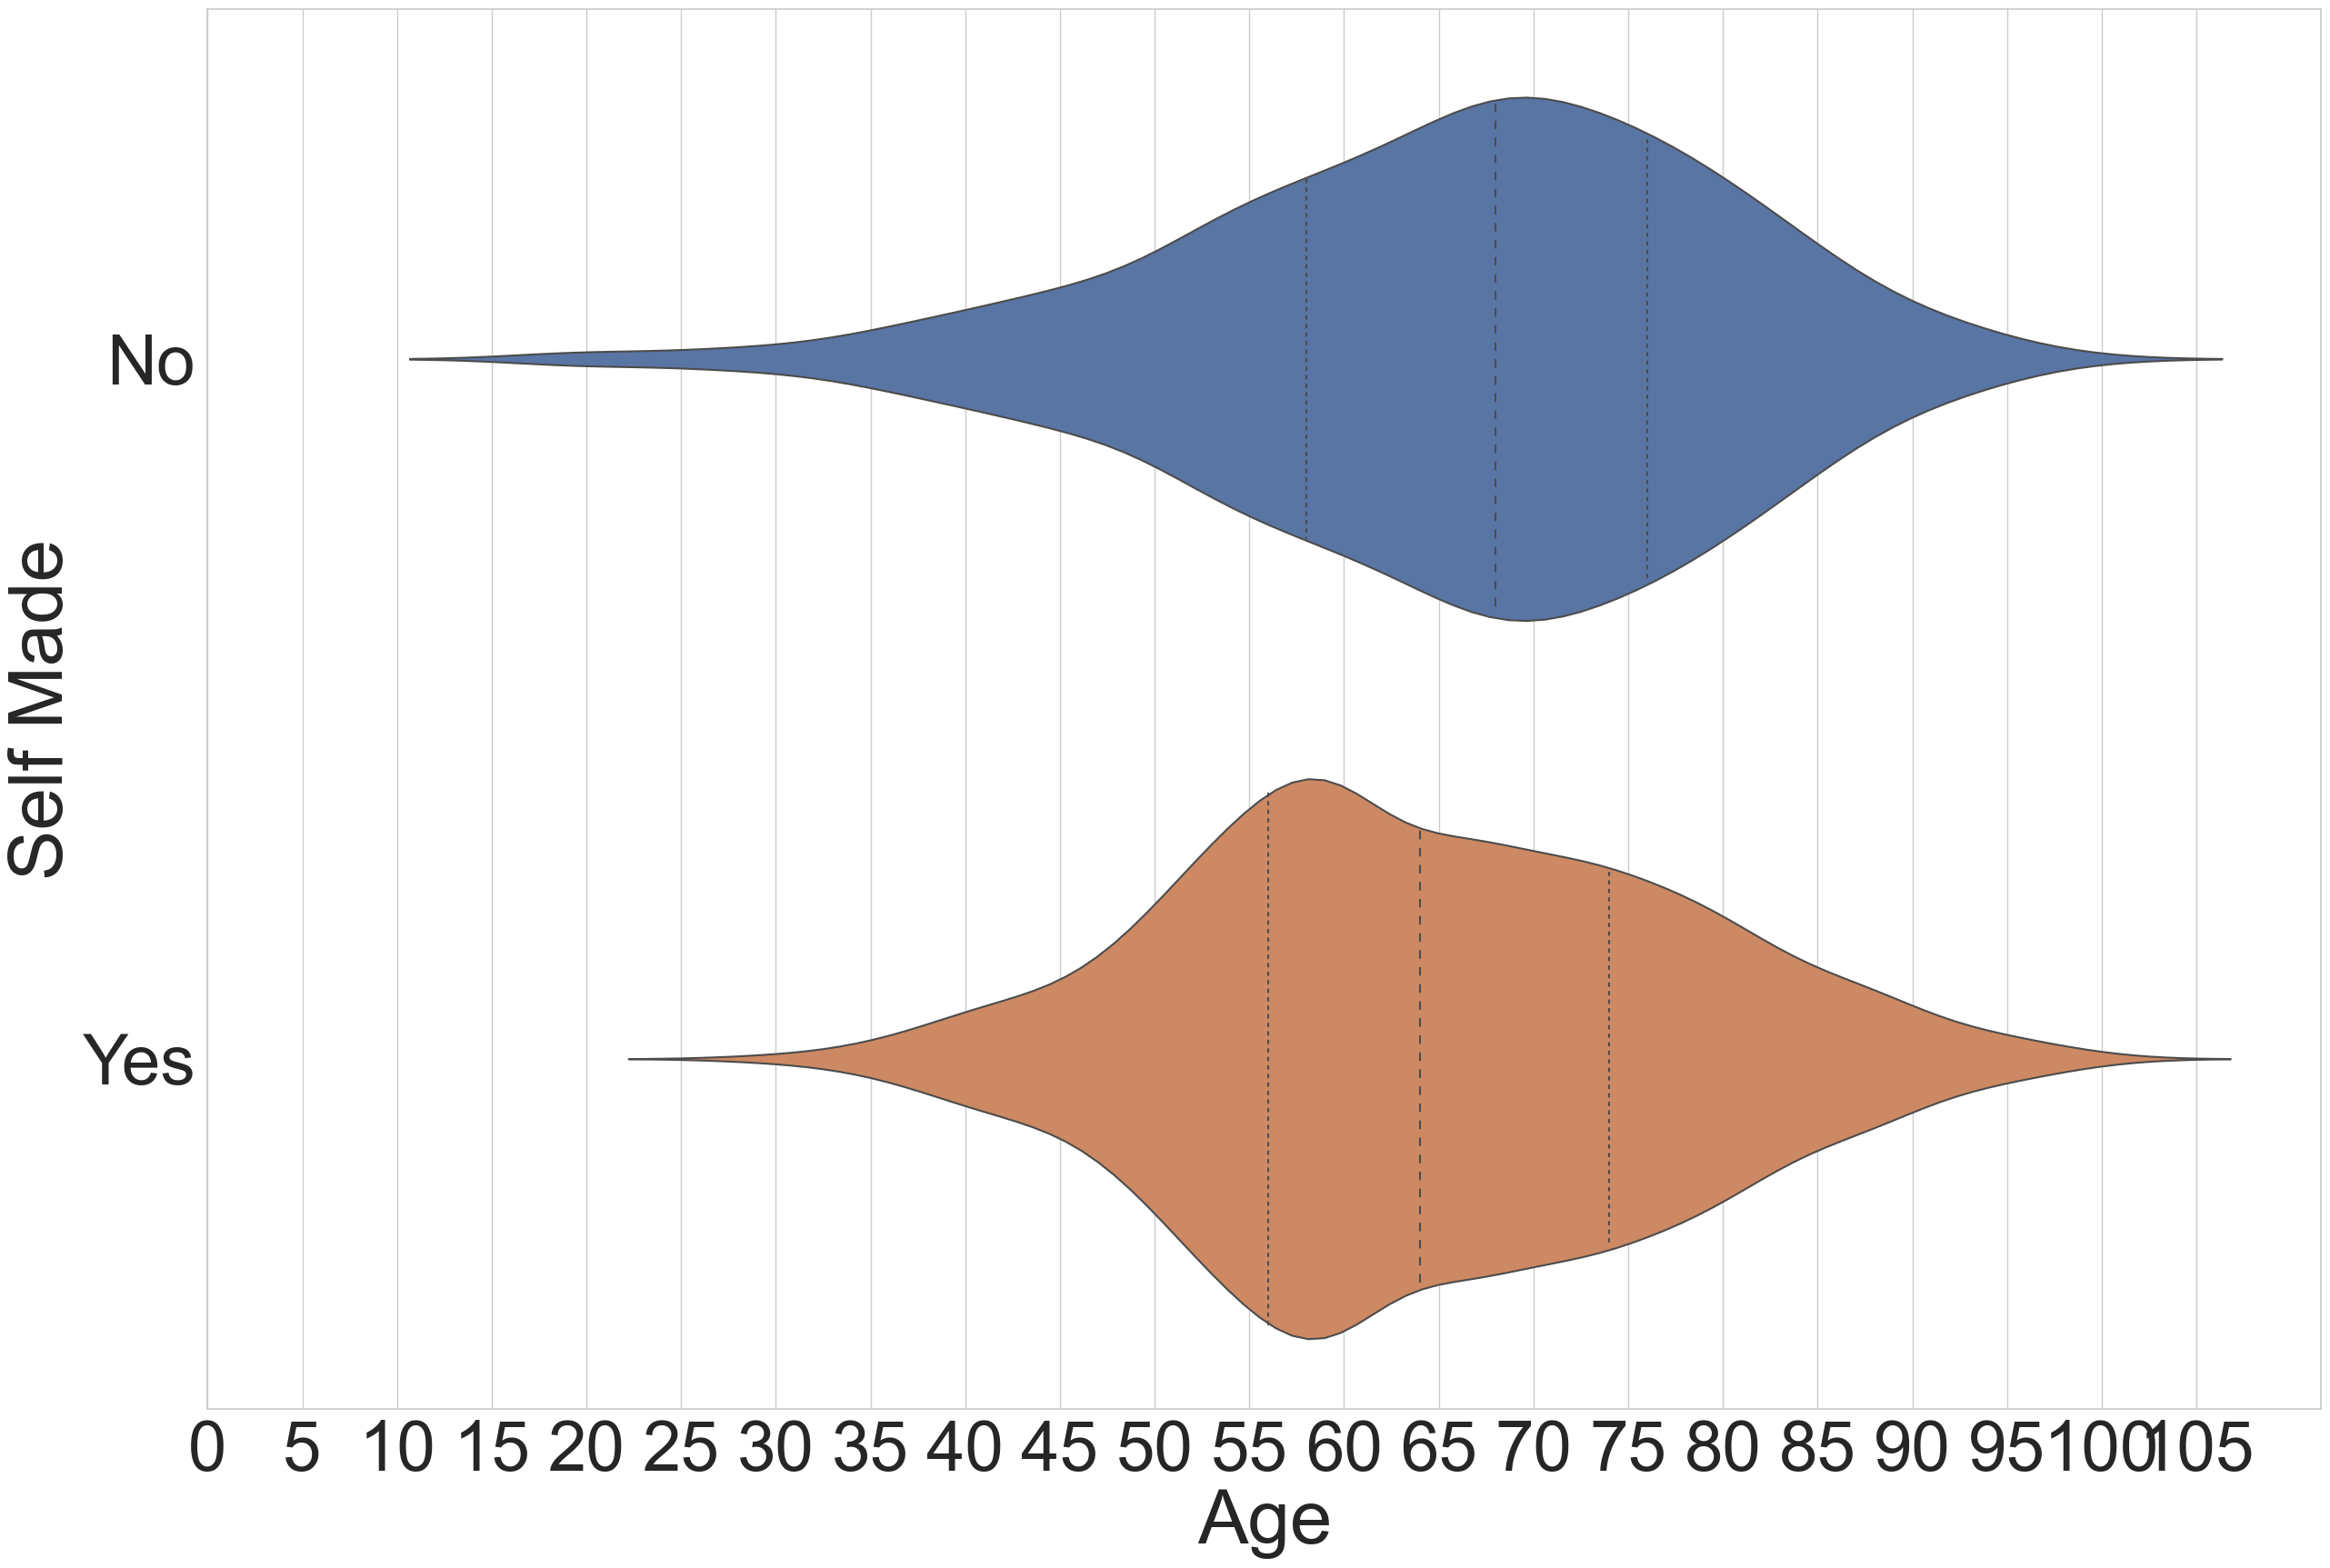

In [115]:
plt.figure(figsize=(30, 20))
with sns.axes_style("whitegrid"):
    sns.violinplot(y=Inher['selfMade'],
                   x=df['age'],
                   data=df,
                   inner="quart",
                   orient='h')

    sns.set(font_scale=3)

    # Customize the x-axis
    plt.xticks(ticks=range(0, 110, 5), labels=range(0, 110, 5))  # Adjust the range as needed
    plt.xlabel('Age')  # You can set a custom x-axis label
    
    plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.ylabel('Self Made')
    
    plt.show()

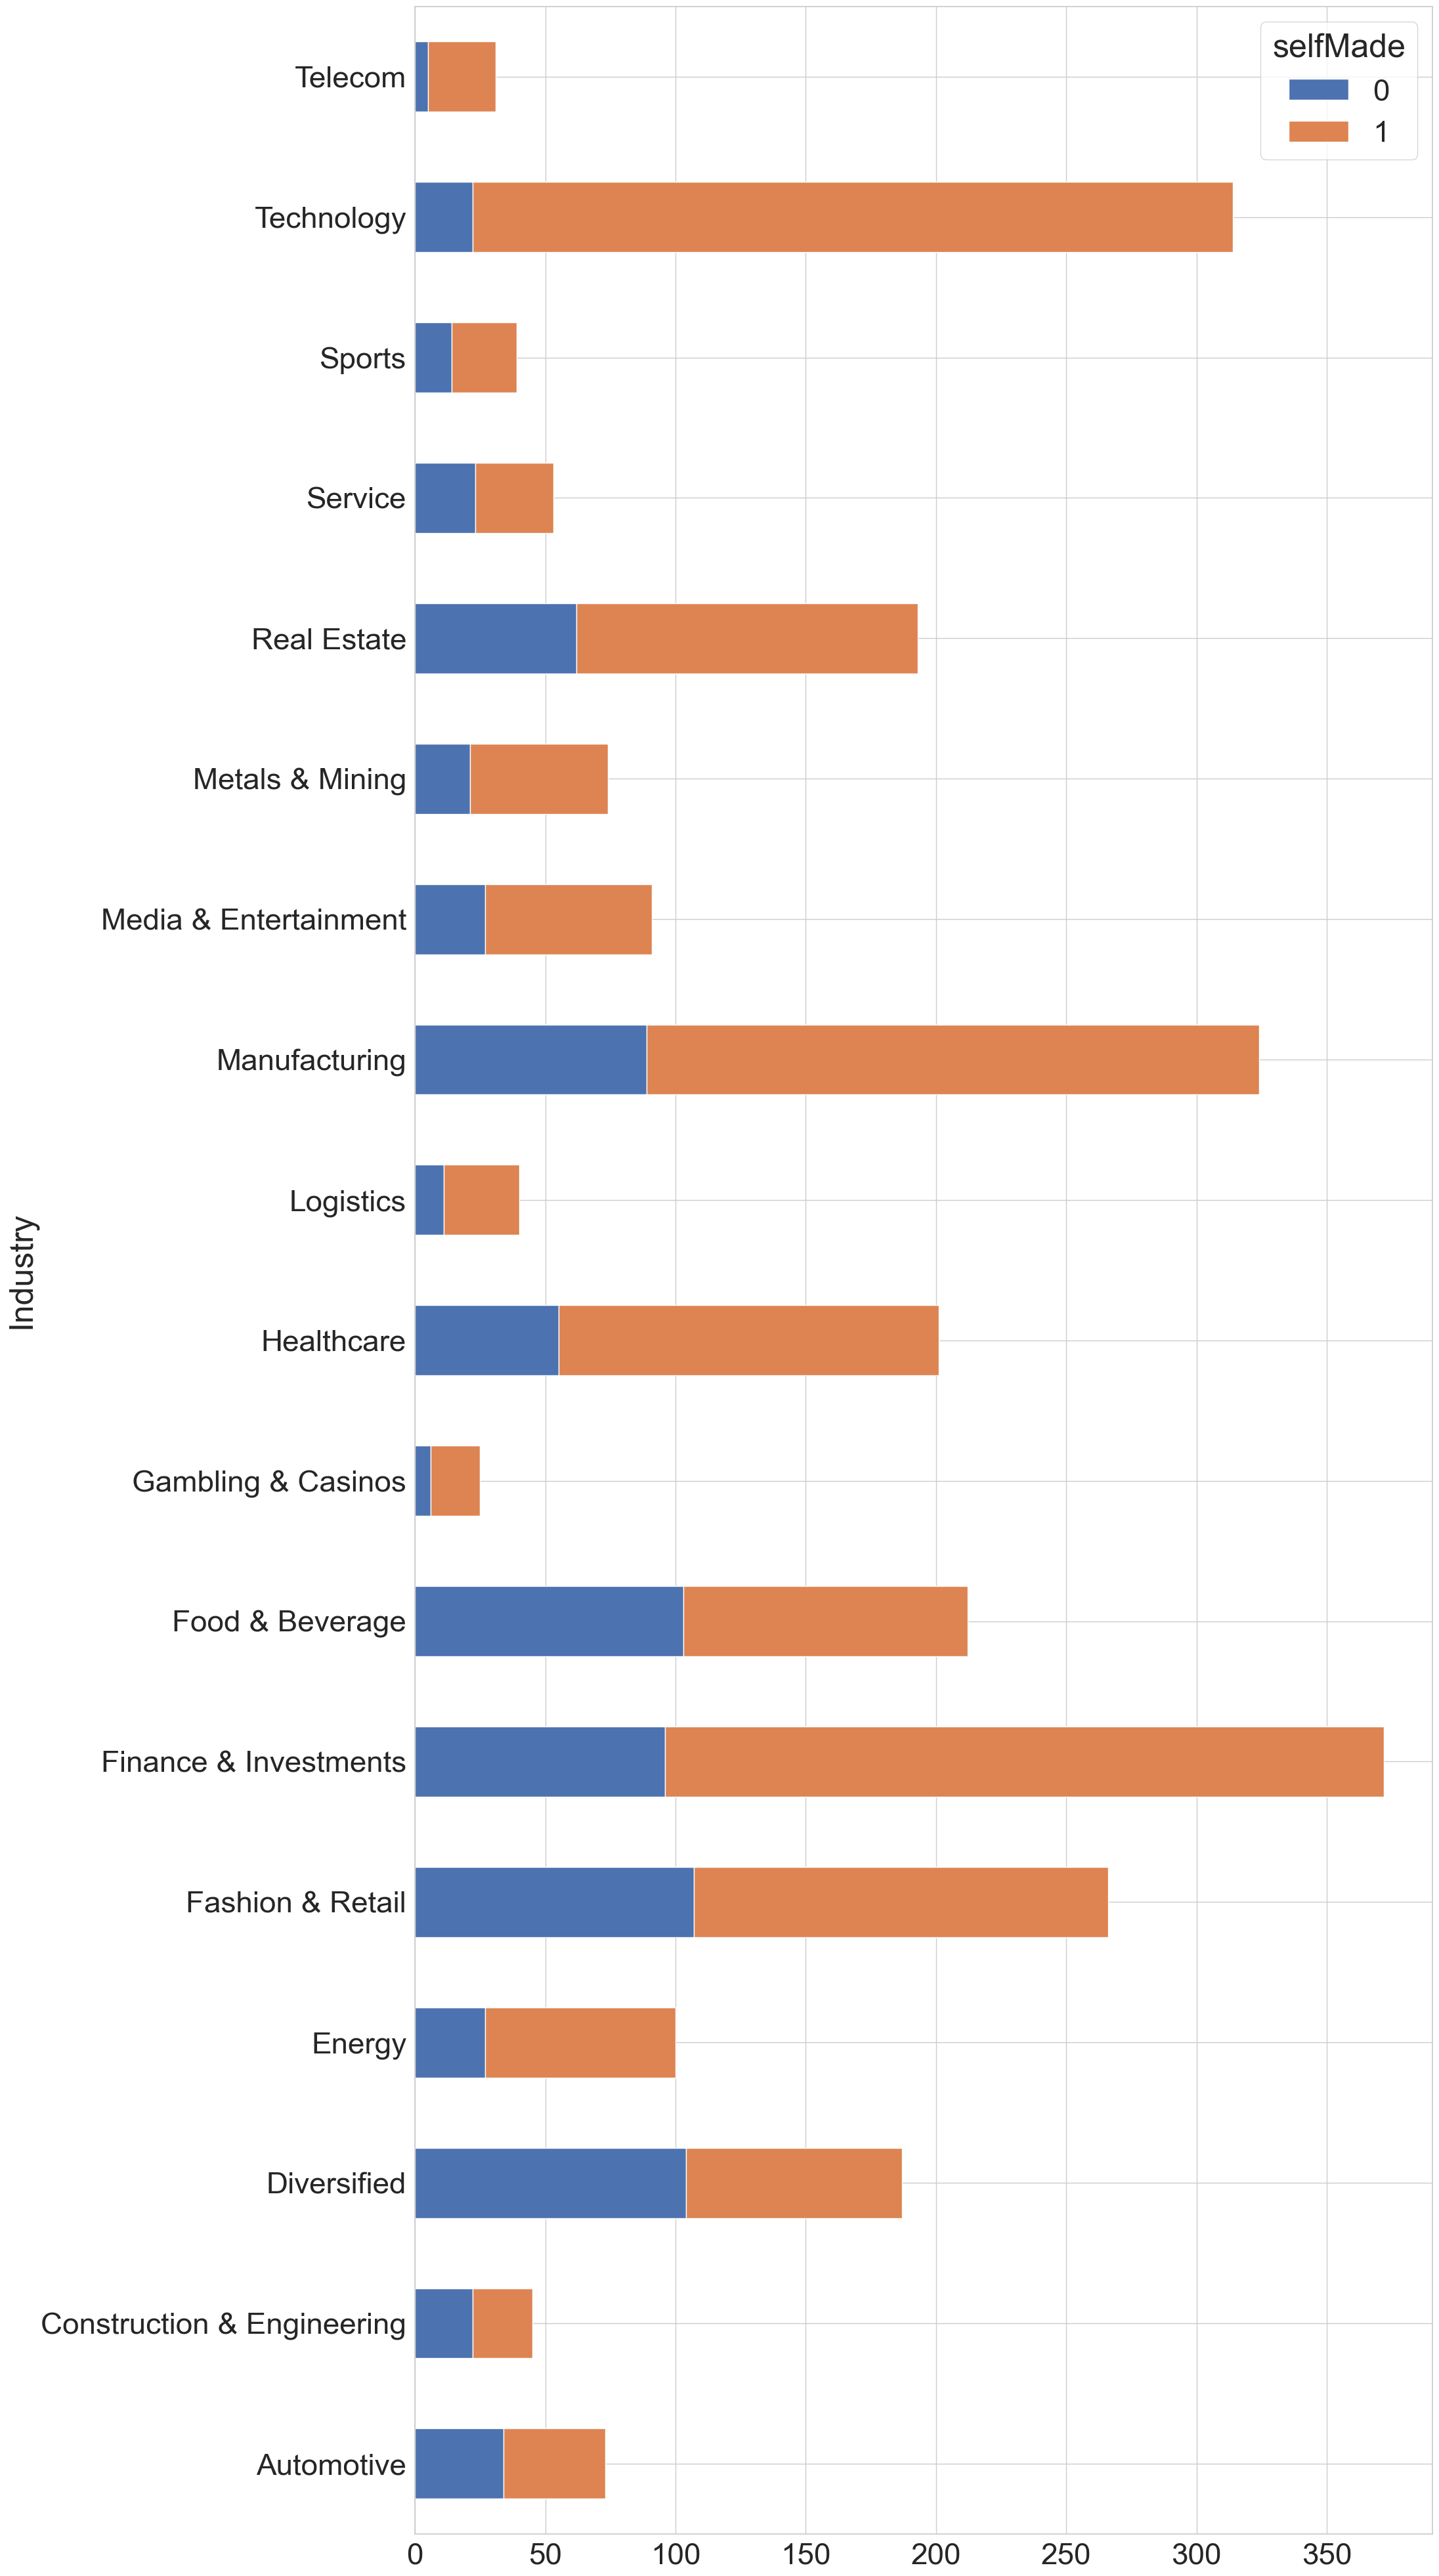

In [116]:
testChart = df.groupby(['industries','selfMade']).size().unstack().plot(kind='barh', stacked=True,figsize=(20, 50))                                                                                                                                                                       
plt.ylabel('Industry')
plt.show()

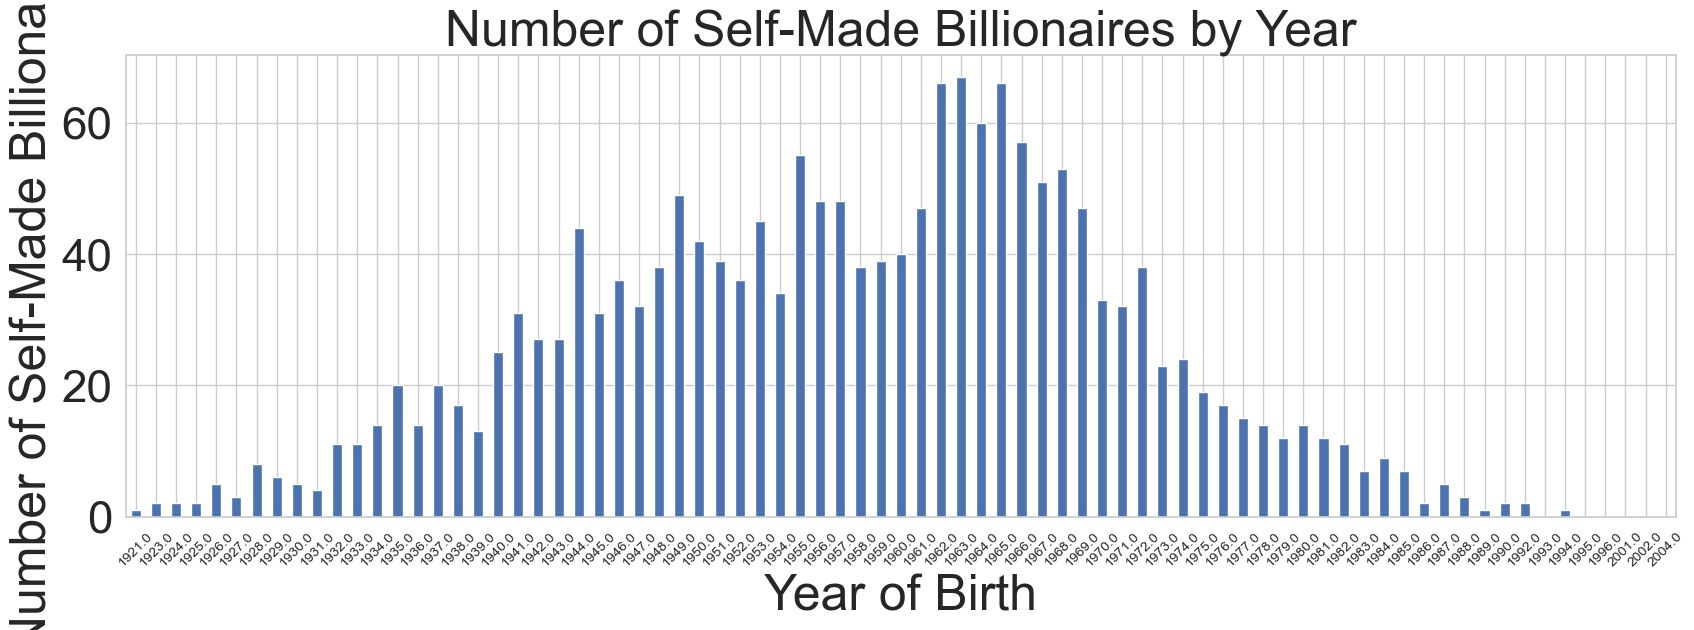

In [117]:
Youngest_Bill = df['birthYear'].max()
self_made_billionaires_by_year = df[df['birthYear'] <= Youngest_Bill].groupby('birthYear')['selfMade'].sum().astype(int)
# Assuming you already have the Youngest_Bill and self_made_billionaires_by_year
self_made_billionaires_by_year = self_made_billionaires_by_year.astype(int)

plt.figure(figsize=(20, 6))
self_made_billionaires_by_year.plot(kind='bar')
plt.title('Number of Self-Made Billionaires by Year')
plt.xlabel('Year of Birth')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Number of Self-Made Billionaires')
plt.show()



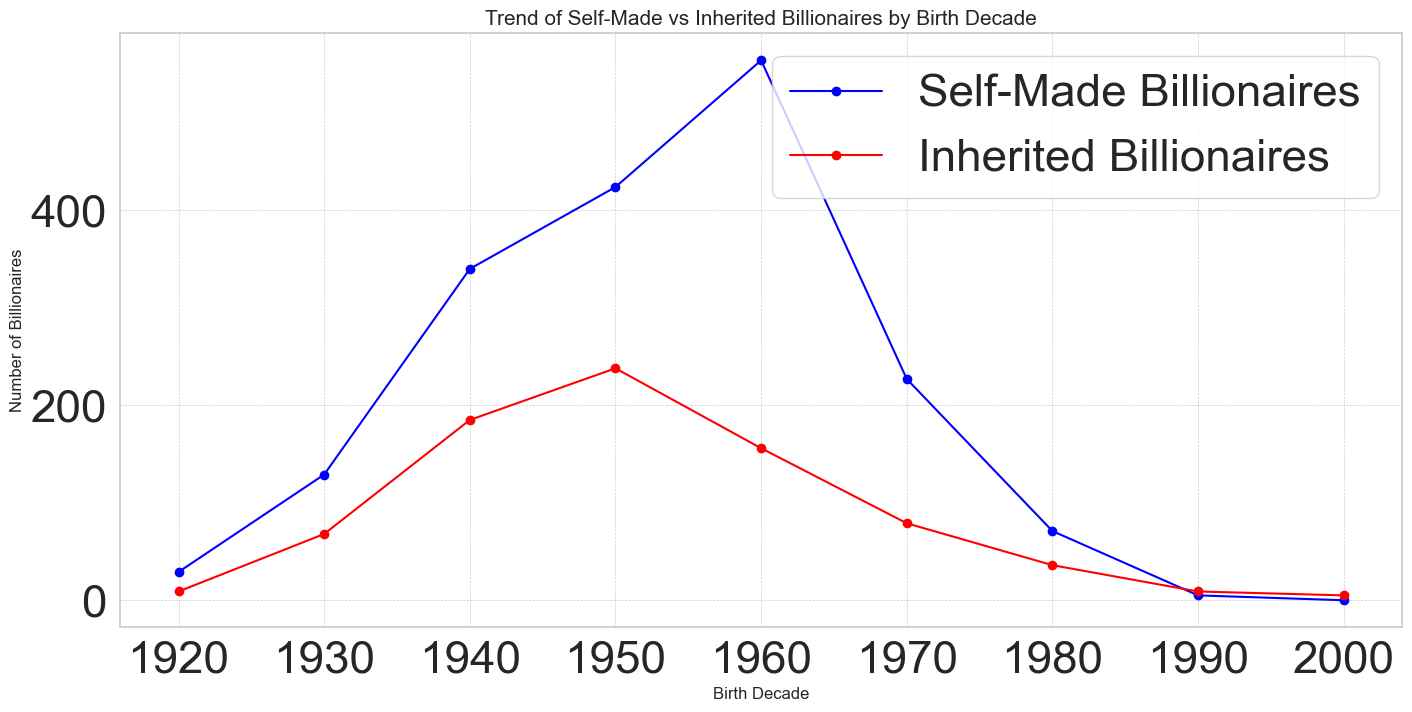

In [118]:

data_path = 'Billionaires Statistics Dataset.csv'  # Adjust this if your path is different
data = pd.read_csv(data_path)

# Group by birth decade and selfMade status
data['Birth Decade'] = (data['birthYear'] // 10) * 10
trend_data = data.groupby(['Birth Decade', 'selfMade']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(15, 8))
trend_data[True].plot(label='Self-Made Billionaires', color='blue', marker='o')
trend_data[False].plot(label='Inherited Billionaires', color='red', marker='o')

# Setting title, labels, and legend
plt.title('Trend of Self-Made vs Inherited Billionaires by Birth Decade', fontsize=15)
plt.xlabel('Birth Decade', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

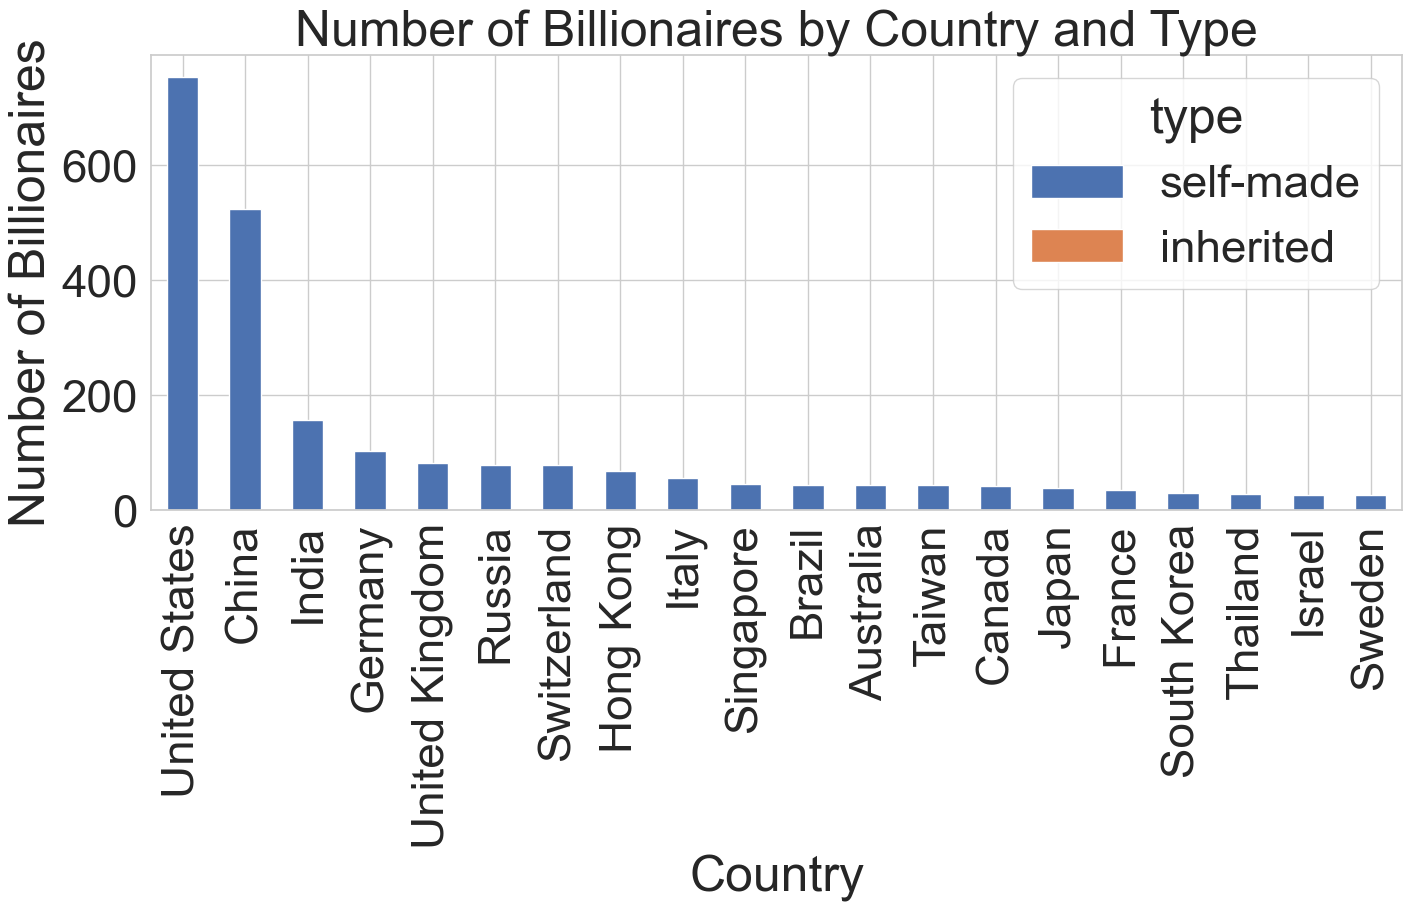

In [119]:
# Adjusting the classification criteria
data['type'] = data['source'].apply(lambda x: 'inherited' if any(keyword in x.lower() for keyword in ['heir', 'heiress', 'descendant', 'family', 'inheritance']) else 'self-made')

# Group by country and type, then count the number of billionaires
grouped_data = data.groupby(['country', 'type']).size().unstack().fillna(0)

# Ensure both columns exist
grouped_data['self-made'] = grouped_data.get('self-made', 0)
grouped_data['inherited'] = grouped_data.get('inherited', 0)

# Sort the data
grouped_data = grouped_data.sort_values(by=['self-made', 'inherited'], ascending=[False, False])

# Plot the stacked bar graph again
plt.figure(figsize=(15,10))
grouped_data.head(20).plot(kind='bar', stacked=True, figsize=(15,10))
plt.title("Number of Billionaires by Country and Type")
plt.ylabel("Number of Billionaires")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

In [120]:
colors = ["steelblue","dodgerblue","lightskyblue","powderblue","cyan","deepskyblue","cyan","darkturquoise","paleturquoise","turquoise"]


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

In [121]:
Industries = df[['personName','industries']]
Industries

personName             industries
0     Bernard Arnault & family       Fashion & Retail
1                    Elon Musk             Automotive
2                   Jeff Bezos             Technology
3                Larry Ellison             Technology
4               Warren Buffett  Finance & Investments
...                        ...                    ...
2635                   Yu Rong             Healthcare
2636    Richard Yuengling, Jr.        Food & Beverage
2637             Zhang Gongyun          Manufacturing
2638    Zhang Guiping & family            Real Estate
2639               Inigo Zobel            Diversified

[2640 rows x 2 columns]

In [122]:
df[['gender']].describe()

gender
count    2640
unique      2
top         M
freq     2303

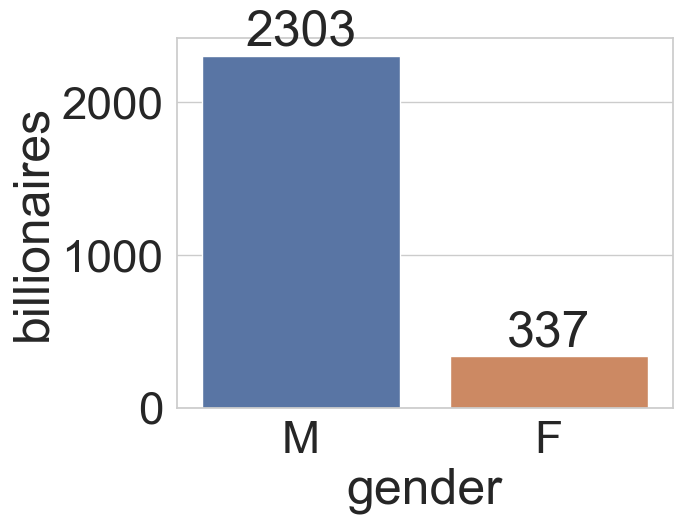

In [123]:
gender = sns.countplot(x = 'gender', data = df)
color = ['pink']
for bars in gender.containers:
    gender.bar_label(bars)
    plt.ylabel('billionaires')

In [124]:
balance_check = df.gender.value_counts()
balance_check = df.gender.value_counts()
balance_check

M    2303
F     337
Name: gender, dtype: int64

<Axes: >

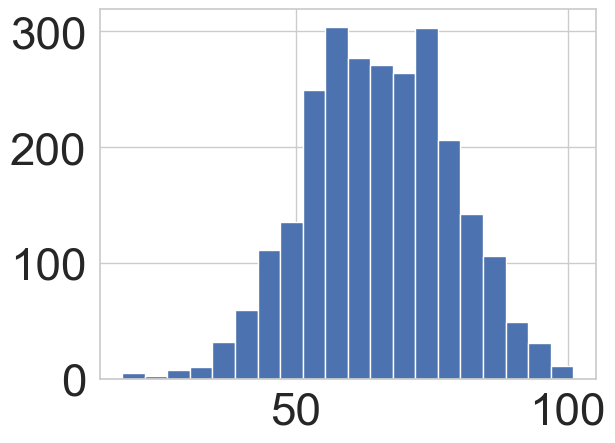

In [125]:
df.age.hist(bins=20)

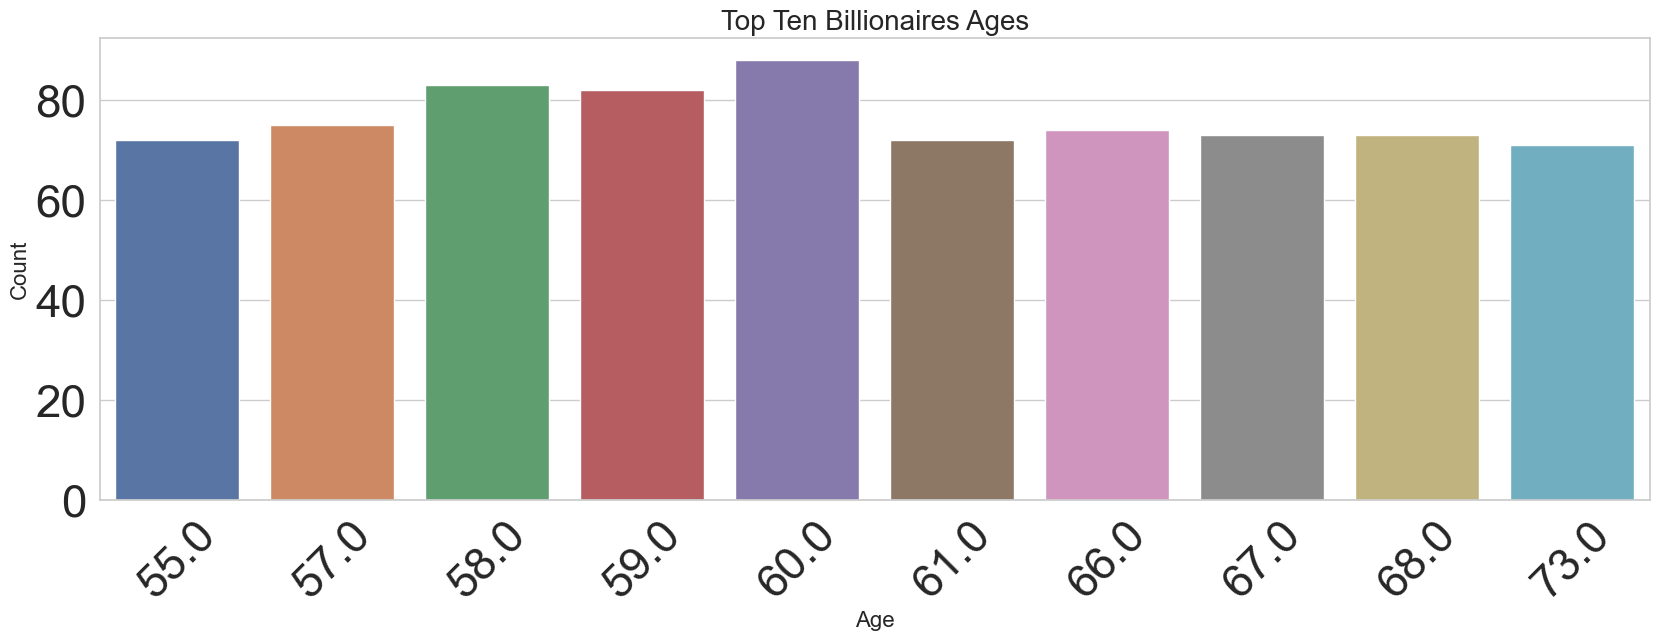

In [126]:
# Get the top 10 most common ages in the 'age' column
top_10_ages = df['age'].value_counts().head(10)

plt.figure(figsize=(20, 6))
sns.barplot(x=top_10_ages.index, y=top_10_ages.values)
plt.title("Top Ten Billionaires Ages", fontsize=20)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

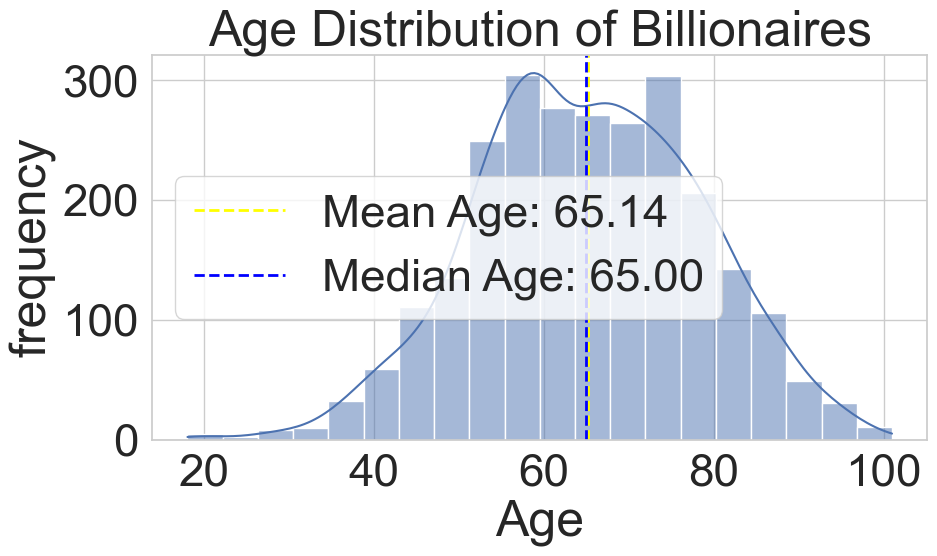

In [127]:
# Calculate summary statistics for age
age_mean = df['age'].mean()
age_median = df['age'].median()

# Create an age distribution plot (histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df['age'].dropna(), bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age Distribution of Billionaires')
plt.axvline(age_mean, color='yellow', linestyle='dashed', linewidth=2, label=f'Mean Age: {age_mean:.2f}')
plt.axvline(age_median, color='blue', linestyle='dashed', linewidth=2, label=f'Median Age: {age_median:.2f}')
plt.legend()
plt.show()

Text(0, 0.5, 'Final Worth')

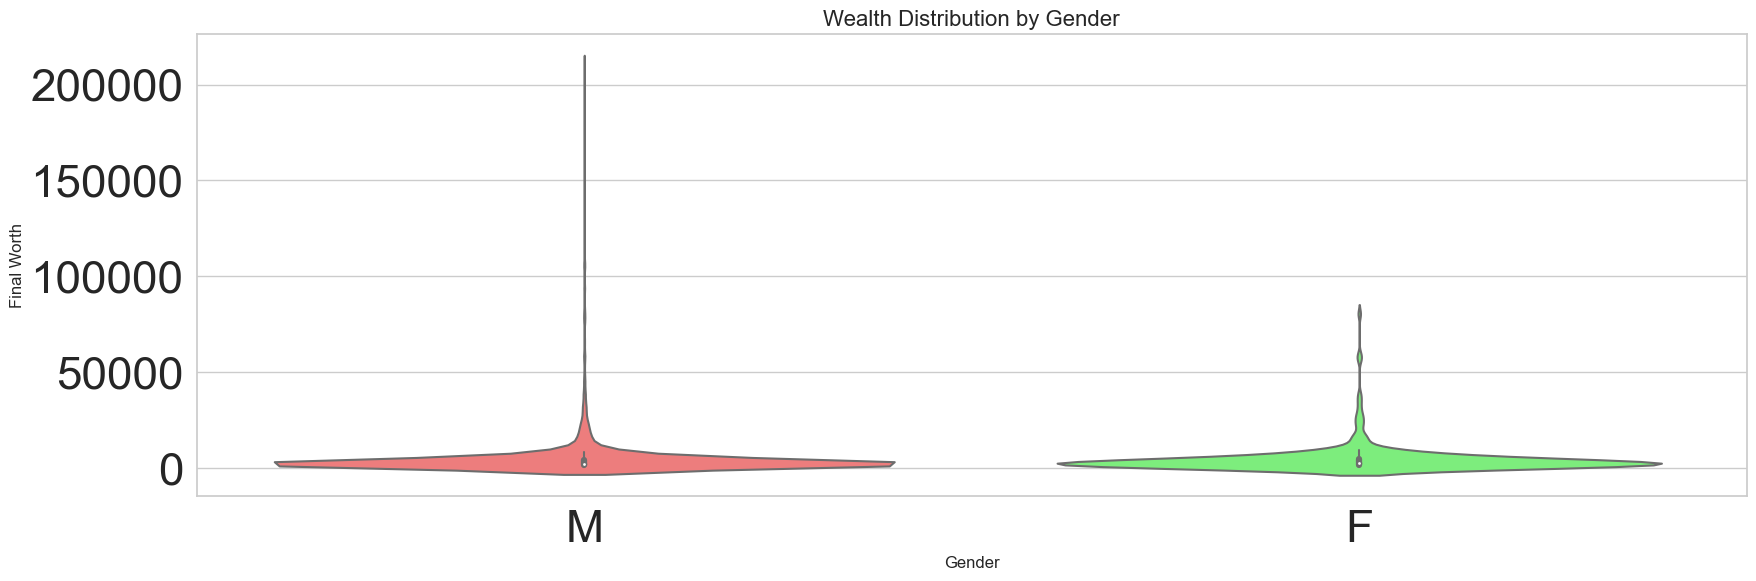

In [128]:
colors = ['#FF6B6B', '#6BFF6B']

plt.figure(figsize=(20, 6))
sns.violinplot(data=df, x='gender', y='finalWorth', palette=colors)
plt.title('Wealth Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Final Worth', fontsize=12)

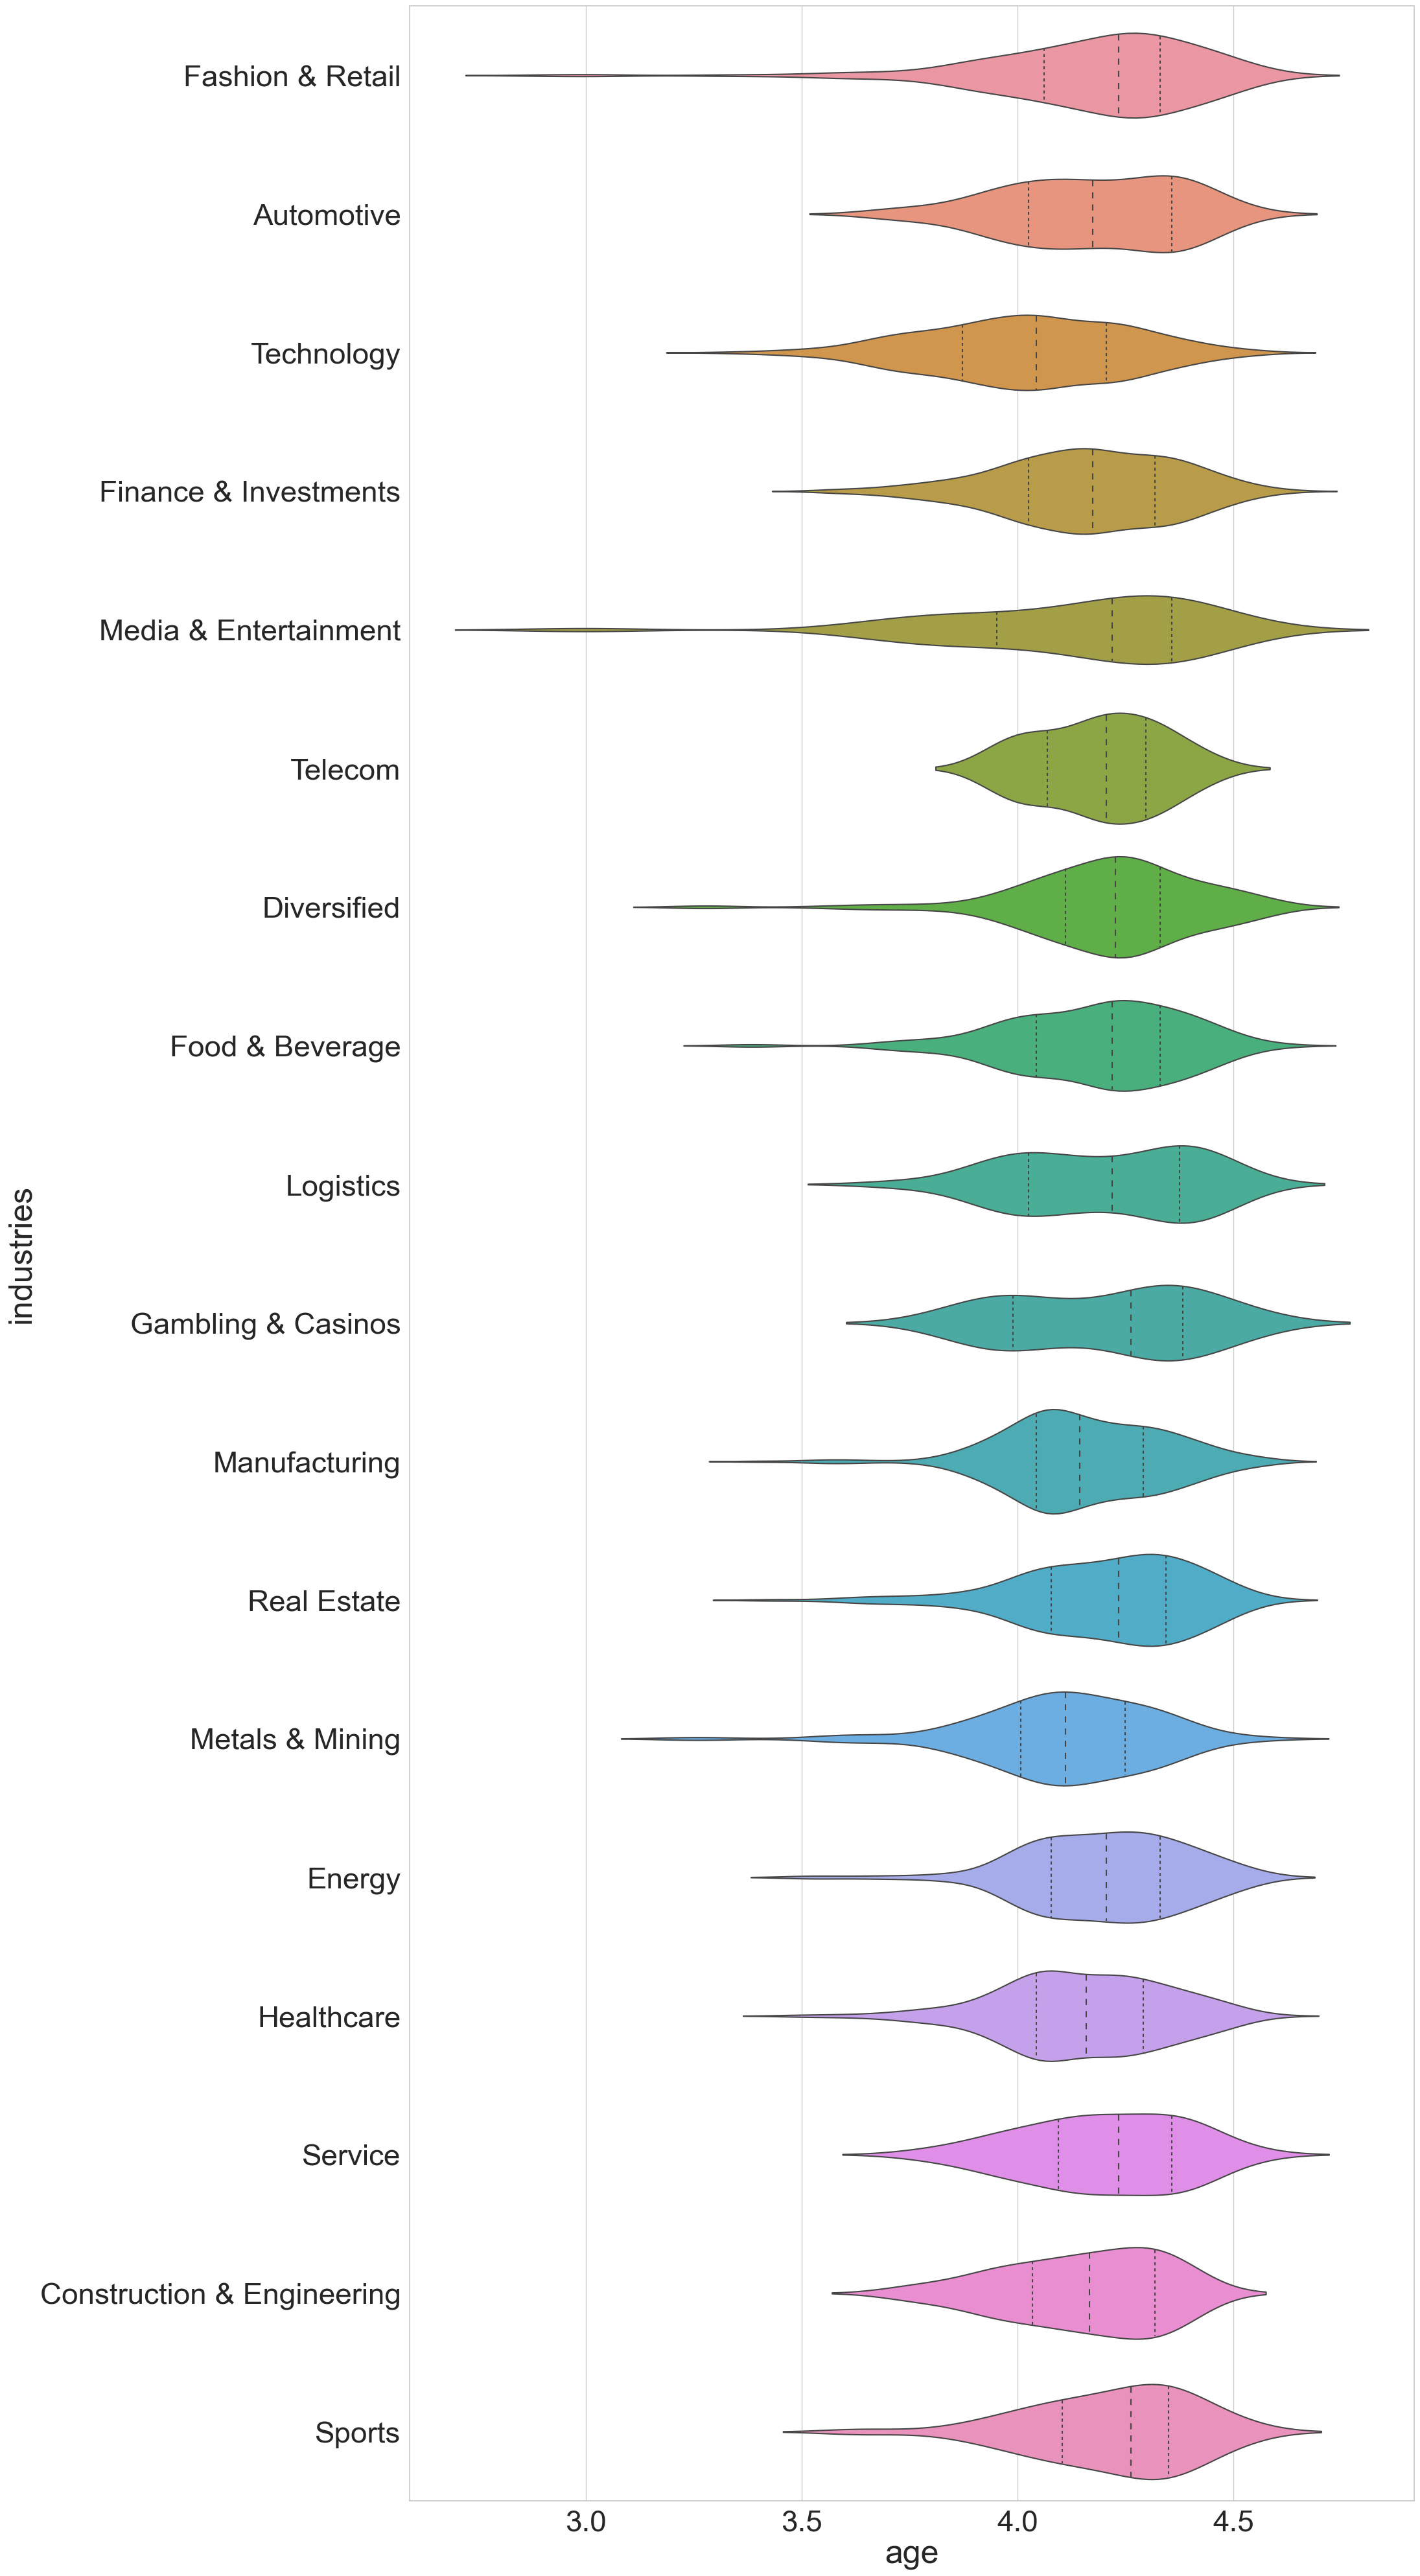

In [129]:
plt.figure(figsize=(20,50))
with sns.axes_style("whitegrid"):
    sns.violinplot(x=np.log(df['age']), 
                   y='industries', 
                   data=df, 
                   inner="quart")
    
    sns.set(font_scale=5) 
    plt.show()

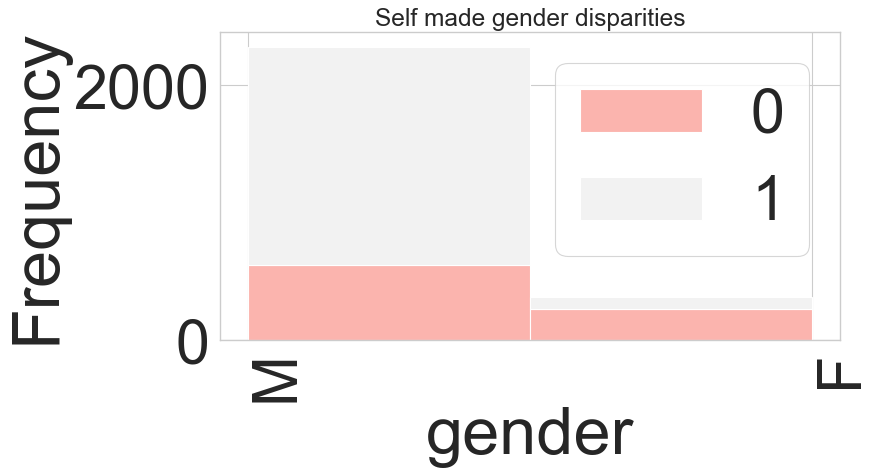

In [130]:
x_var = 'gender'
groupby_var = 'selfMade'
df_agg = df.loc[:,[x_var, groupby_var]].groupby(groupby_var)
vals = [data_[x_var].values.tolist() for i, data_ in df_agg]

plt.figure(figsize=(10,5), dpi=80)
colors = [plt.cm.Pastel1(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Self made gender disparities".format(x_var, groupby_var), fontsize=22)
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical', horizontalalignment='left')
plt.show()

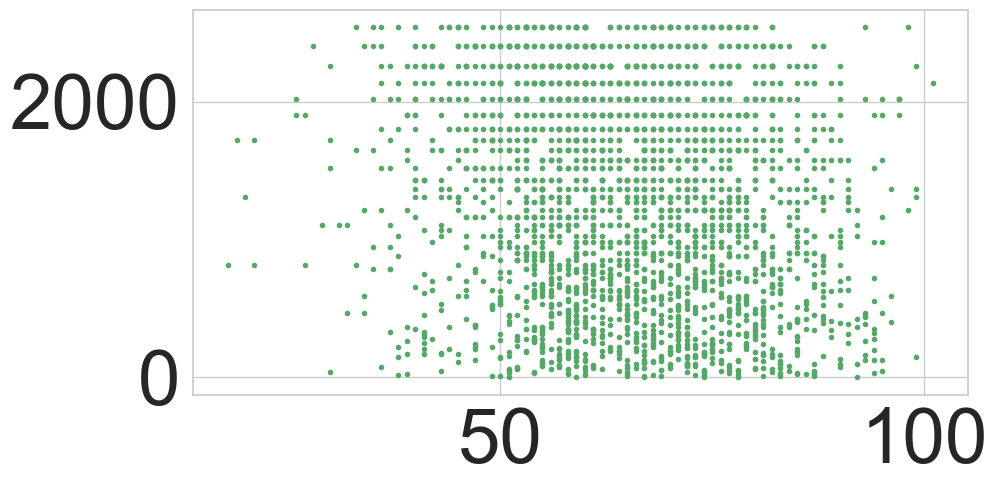

In [131]:
# Produce a single scatter plot showing age and passenger class as well as age and number of siblings, 
# different symbols should be used to represent the two different comparisons 
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['age'], df["rank"], color='g', marker='.')
plt.show()

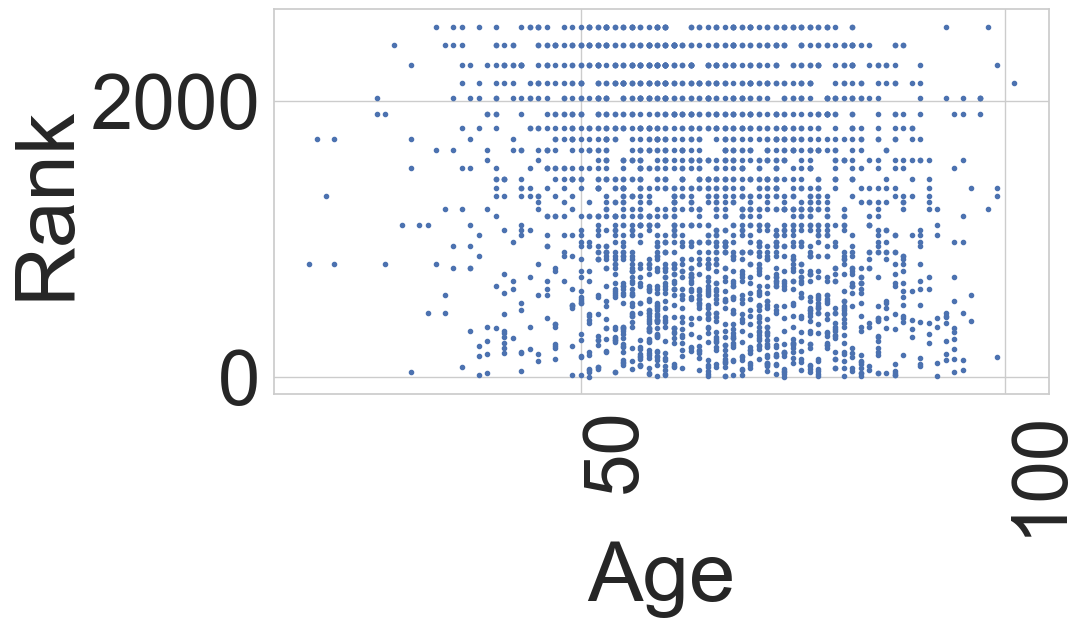

In [132]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['age'], df['rank'], color='b', marker='.')
plt.xlabel('Age')
plt.ylabel('Rank')
plt.xticks(rotation='vertical', horizontalalignment='left')
plt.show()

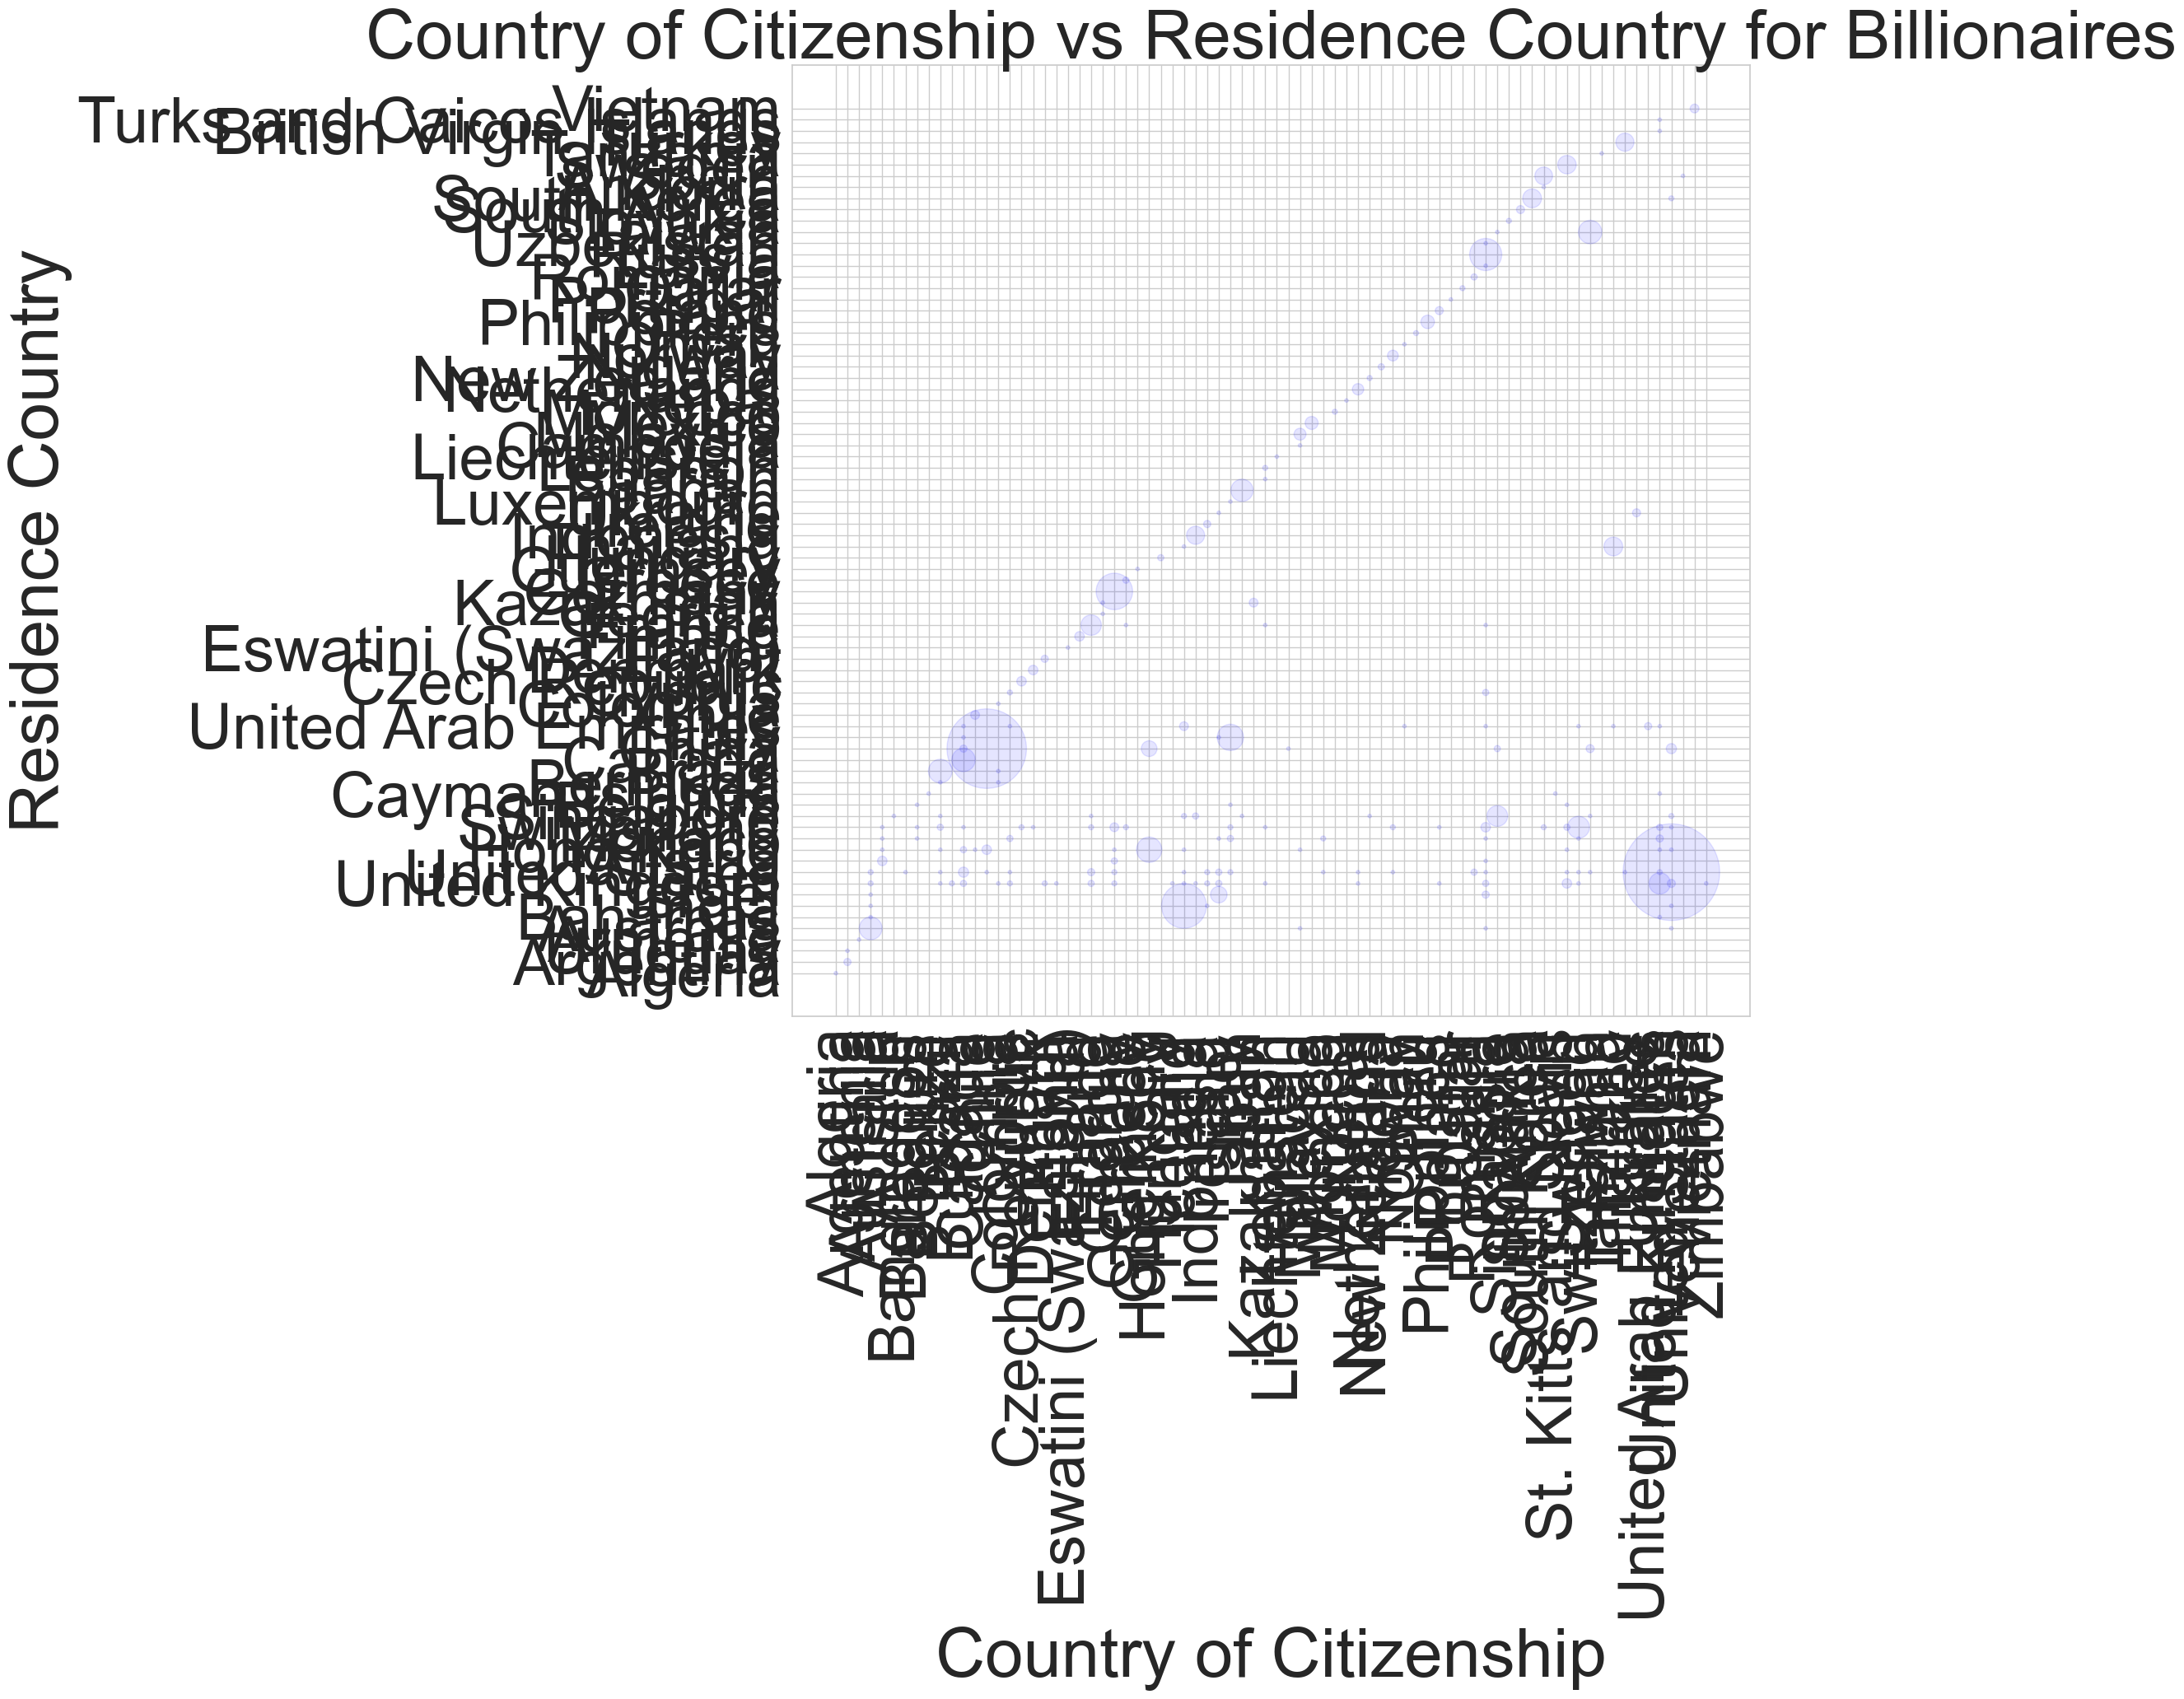

In [133]:

# Counting the number of occurrences for each unique pair of 'countryOfCitizenship' and 'country'
CountryOfCitizenshipVsResidence = df.groupby(['countryOfCitizenship', 'country']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(15, 15))
plt.scatter(CountryOfCitizenshipVsResidence['countryOfCitizenship'], CountryOfCitizenshipVsResidence['country'], s=CountryOfCitizenshipVsResidence['count']*10,c='blue', alpha=0.10)
plt.title('Country of Citizenship vs Residence Country for Billionaires')
plt.xlabel('Country of Citizenship')
plt.ylabel('Residence Country')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

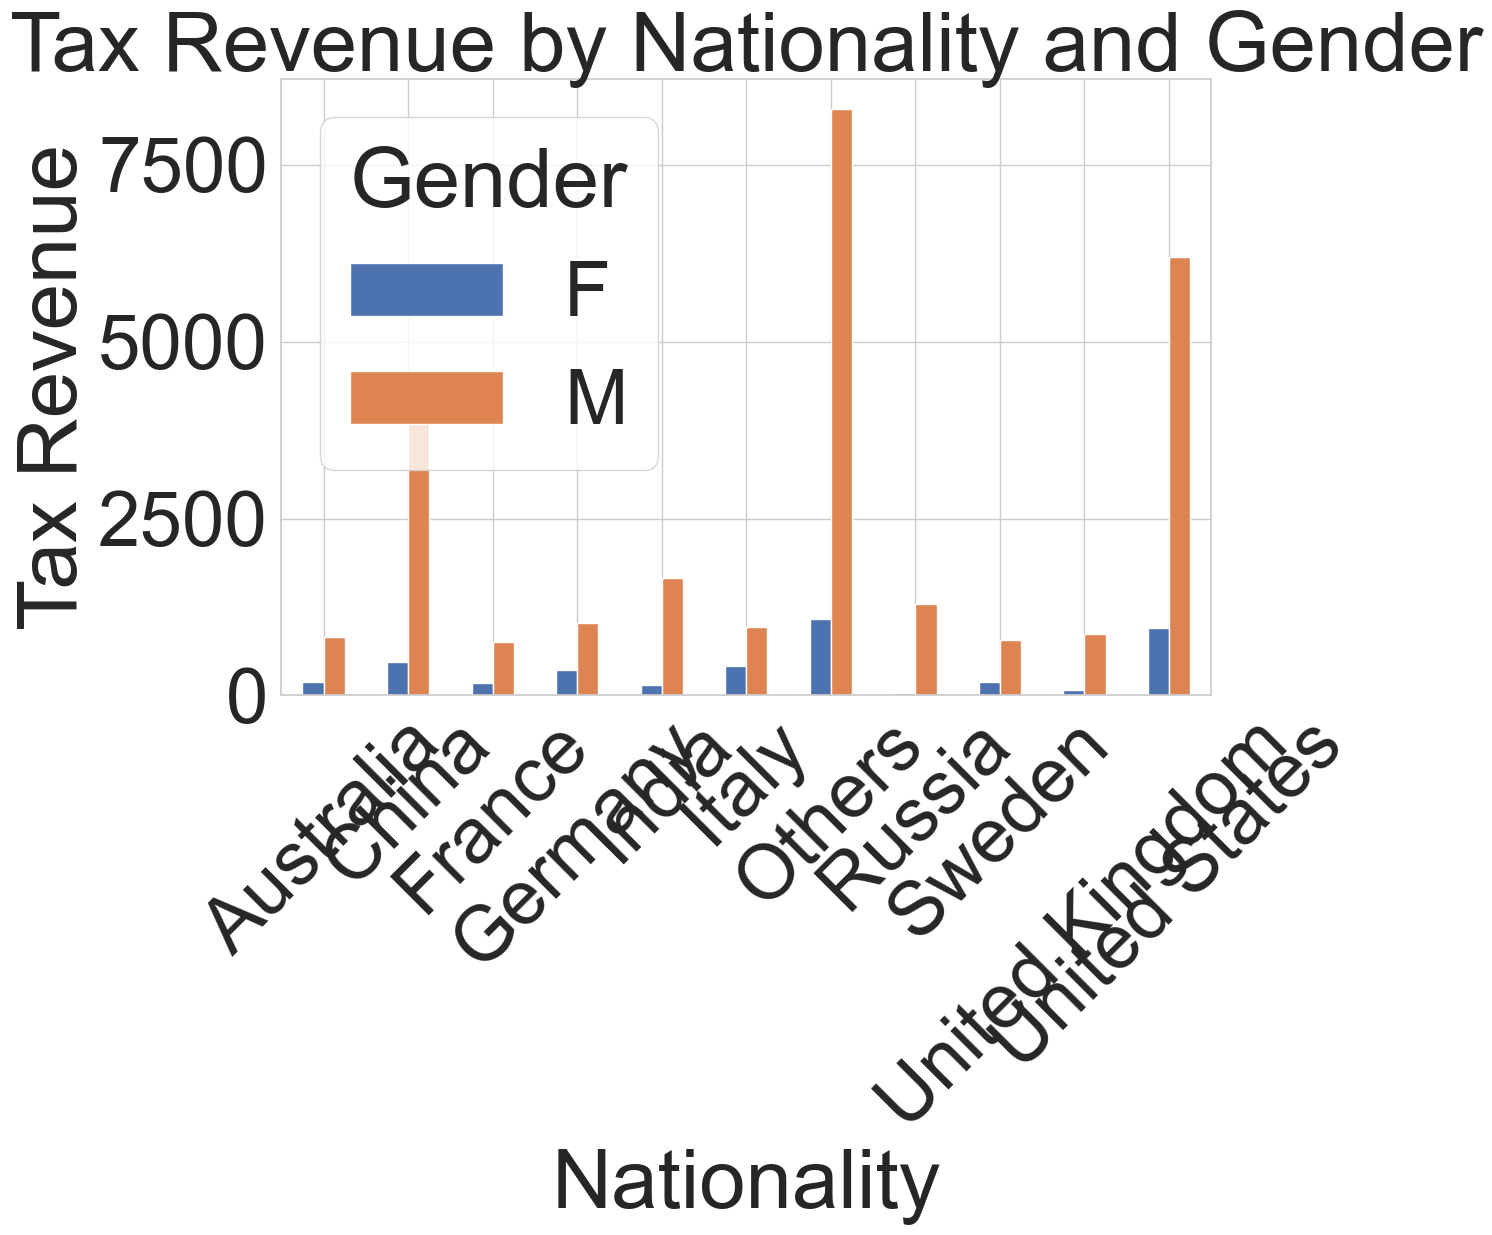

In [134]:
# Grouping data by nationality and gender while summing tax revenues
TaxByNationality = df.groupby('countryOfCitizenship')['tax_revenue_country_country'].sum()
TopNationalities = TaxByNationality.nlargest(10)  # Selecting top 10 nationalities, change the number as needed

# Filter to include only the top nationalities and group the rest as 'Others'
df['Country_Grouped'] = df['countryOfCitizenship'].where(df['countryOfCitizenship'].isin(TopNationalities.index), 'Others')

# Grouping data by grouped nationality and gender while summing tax revenues
TaxNationalityGroupedGender = df.groupby(['Country_Grouped', 'gender'])['tax_revenue_country_country'].sum().unstack()

# Plotting bar chart
TaxNationalityGroupedGender.plot(kind='bar', figsize=(12, 8))
plt.title('Tax Revenue by Nationality and Gender')
plt.xlabel('Nationality')
plt.ylabel('Tax Revenue')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

In [135]:
# Unsupervised

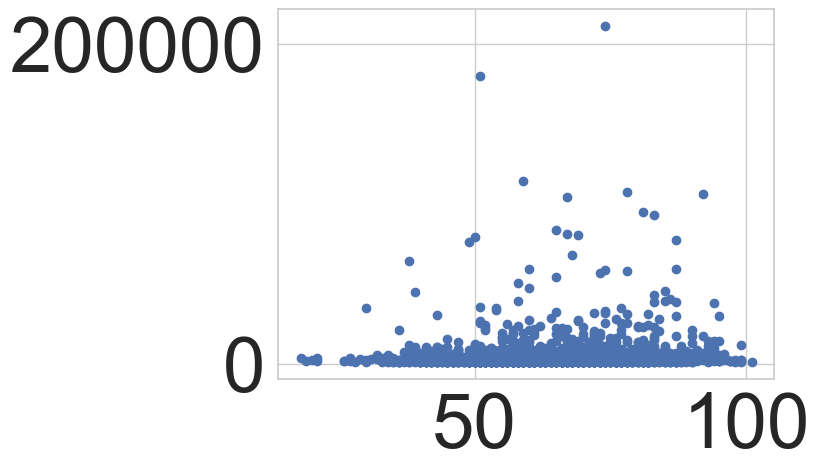

In [136]:
plt.scatter(df['age'],df['finalWorth'])
plt.show()

In [137]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

df.dropna(inplace=True)
km = KMeans(n_clusters=2)
km

y_predicted = km.fit_predict(df[['age', 'finalWorth']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:
df['cluster'] = y_predicted
df.head()


rank  finalWorth               category      personName   age  \
1     2      180000             Automotive       Elon Musk  51.0   
2     3      114000             Technology      Jeff Bezos  59.0   
3     4      107000             Technology   Larry Ellison  78.0   
4     5      106000  Finance & Investments  Warren Buffett  92.0   
5     6      104000             Technology      Bill Gates  67.0   

         country    city              source             industries  \
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   
5  United States  Medina           Microsoft             Technology   

  countryOfCitizenship  ... gross_primary_education_enrollment_country  \
1        United States  ...                                      101.8   
2        United States  ...                                      101.8   
3        United States  ...                                      101.8   
4        United States  ...                                      101.8   
5        United States  ...                                      101.8   

   life_expectancy_country tax_revenue_country_country total_tax_rate_country  \
1                     78.5                         9.6                   36.6   
2                     78.5                         9.6                   36.6   
3                     78.5                         9.6                   36.6   
4                     78.5                         9.6                   36.6   
5                     78.5                         9.6                   36.6   

  population_country latitude_country longitude_country log_finalWorth  \
1        328239523.0         37.09024        -95.712891      12.100712   
2        328239523.0         37.09024        -95.712891      11.643954   
3        328239523.0         37.09024        -95.712891      11.580584   
4        328239523.0         37.09024        -95.712891      11.571194   
5        328239523.0         37.09024        -95.712891      11.552146   

  Country_Grouped cluster  
1   United States       1  
2   United States       1  
3   United States       1  
4   United States       1  
5   United States       1  

[5 rows x 38 columns]

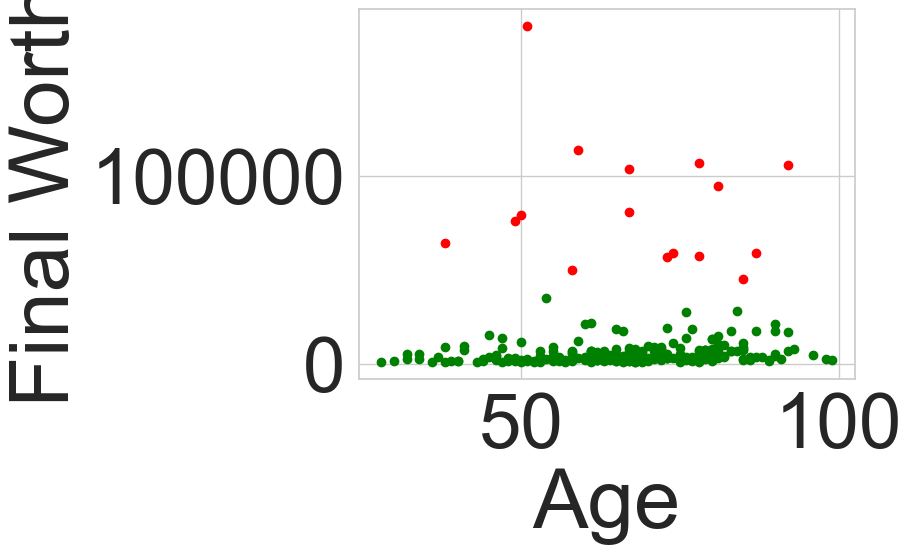

In [139]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]

plt.scatter(df0.age,df0['finalWorth'],color='green')
plt.scatter(df1.age,df1['finalWorth'],color='red')

plt.xlabel('Age')
plt.ylabel('Final Worth')
plt.legend
plt.show()

In [140]:
km.cluster_centers_

array([[6.62297297e+01, 5.39954955e+03],
       [6.79375000e+01, 8.33187500e+04]])

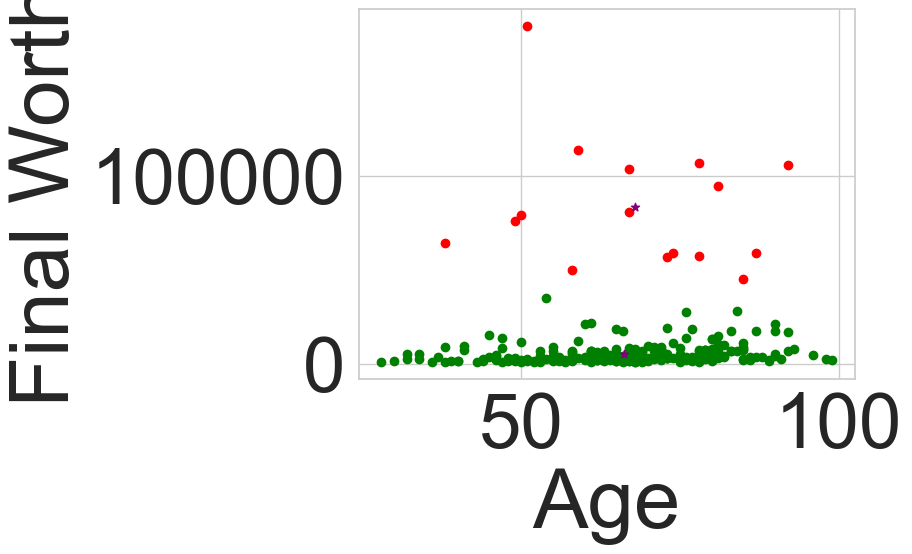

In [141]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]


plt.scatter(df0.age,df0['finalWorth'],color='green')
plt.scatter(df1.age,df1['finalWorth'],color='red')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Final Worth')
plt.legend
plt.show()

In [142]:
scaler = MinMaxScaler()
scaler.fit(df[['finalWorth']])
df['finalWorth'] = scaler.transform(df['finalWorth'])

scaler.fit(df.age)
df.age = scaler.transform(df.age)
df

ValueError: Expected 2D array, got 1D array instead:
array=[180000. 114000. 107000. 106000. 104000.  94500.  80700.  79200.  76000.
  64400.  59000.  58800.  57600.  56700.  50100.  45100.  35000.  28100.
  27800.  21600.  21100.  21000.  19100.  18500.  18500.  17500.  17500.
  17400.  17400.  17100.  15500.  14900.  13700.  13700.  13300.  13300.
  12000.  11400.  11300.  10900.  10600.  10200.   9600.   9300.   9200.
   9000.   8800.   8800.   8800.   8600.   8500.   8400.   8100.   8000.
   8000.   7900.   7700.   7700.   7600.   7600.   7500.   7500.   7500.
   7400.   7400.   7200.   7200.   7100.   7000.   7000.   7000.   7000.
   6900.   6800.   6800.   6800.   6800.   6700.   6700.   6700.   6700.
   6700.   6700.   6600.   6600.   6500.   6400.   6400.   5900.   5500.
   5500.   5500.   5500.   5500.   5300.   5300.   5300.   5100.   5100.
   5100.   4900.   4800.   4800.   4600.   4600.   4600.   4600.   4400.
   4200.   4200.   4200.   4200.   4000.   4000.   4000.   3900.   3900.
   3800.   3800.   3800.   3700.   3700.   3700.   3700.   3600.   3600.
   3500.   3500.   3400.   3400.   3400.   3400.   3400.   3300.   3300.
   3300.   3200.   3200.   3200.   3200.   3100.   3100.   3100.   3000.
   3000.   2900.   2900.   2900.   2900.   2800.   2800.   2700.   2700.
   2600.   2500.   2500.   2500.   2500.   2500.   2400.   2400.   2400.
   2400.   2400.   2300.   2300.   2300.   2200.   2200.   2200.   2200.
   2200.   2200.   2200.   2200.   2100.   2100.   2100.   2100.   2100.
   2100.   1900.   1900.   1900.   1900.   1900.   1900.   1900.   1800.
   1800.   1800.   1800.   1800.   1700.   1700.   1700.   1700.   1700.
   1700.   1700.   1700.   1700.   1600.   1600.   1600.   1600.   1600.
   1500.   1500.   1500.   1500.   1500.   1500.   1500.   1400.   1400.
   1400.   1300.   1300.   1300.   1300.   1300.   1200.   1200.   1200.
   1200.   1100.   1100.   1100.   1100.   1100.   1100.   1100.   1100.
   1000.   1000.   1000.   1000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [143]:
df['cluster'] = y_predicted
df

rank  finalWorth               category      personName   age  \
1        2      180000             Automotive       Elon Musk  51.0   
2        3      114000             Technology      Jeff Bezos  59.0   
3        4      107000             Technology   Larry Ellison  78.0   
4        5      106000  Finance & Investments  Warren Buffett  92.0   
5        6      104000             Technology      Bill Gates  67.0   
...    ...         ...                    ...             ...   ...   
2519  2405        1100                 Sports     Tiger Woods  47.0   
2566  2540        1000       Fashion & Retail  William Fisher  66.0   
2581  2540        1000                 Sports    LeBron James  38.0   
2602  2540        1000             Technology   Apoorva Mehta  36.0   
2608  2540        1000  Media & Entertainment     Tyler Perry  53.0   

            country            city                    source  \
1     United States          Austin             Tesla, SpaceX   
2     United States          Medina                    Amazon   
3     United States           Lanai                    Oracle   
4     United States           Omaha        Berkshire Hathaway   
5     United States          Medina                 Microsoft   
...             ...             ...                       ...   
2519  United States  Jupiter Island                      Golf   
2566  United States   San Francisco                       Gap   
2581  United States     Los Angeles                Basketball   
2602  United States   San Francisco  Grocery delivery service   
2608  United States         Atlanta        Movies, television   

                 industries countryOfCitizenship  ...  \
1                Automotive        United States  ...   
2                Technology        United States  ...   
3                Technology        United States  ...   
4     Finance & Investments        United States  ...   
5                Technology        United States  ...   
...                     ...                  ...  ...   
2519                 Sports        United States  ...   
2566       Fashion & Retail        United States  ...   
2581                 Sports        United States  ...   
2602             Technology               Canada  ...   
2608  Media & Entertainment        United States  ...   

     gross_primary_education_enrollment_country  life_expectancy_country  \
1                                         101.8                     78.5   
2                                         101.8                     78.5   
3                                         101.8                     78.5   
4                                         101.8                     78.5   
5                                         101.8                     78.5   
...                                         ...                      ...   
2519                                      101.8                     78.5   
2566                                      101.8                     78.5   
2581                                      101.8                     78.5   
2602                                      101.8                     78.5   
2608                                      101.8                     78.5   

     tax_revenue_country_country total_tax_rate_country population_country  \
1                            9.6                   36.6        328239523.0   
2                            9.6                   36.6        328239523.0   
3                            9.6                   36.6        328239523.0   
4                            9.6                   36.6        328239523.0   
5                            9.6                   36.6        328239523.0   
...                          ...                    ...                ...   
2519                         9.6                   36.6        328239523.0   
2566                         9.6                   36.6        328239523.0   
2581                         9.6                   36.6        328239523

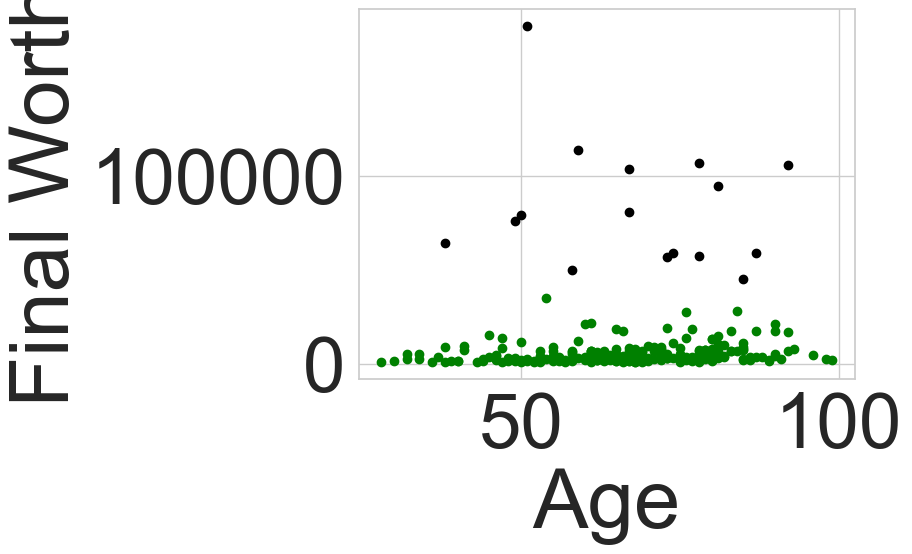

In [144]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.age,df0['finalWorth'],color='green')
plt.scatter(df1.age,df1['finalWorth'],color='black')
plt.scatter(df2.age,df2['finalWorth'],color='red')

plt.xlabel('Age')
plt.ylabel('Final Worth')
plt.legend
plt.show()

In [145]:
km.cluster_centers_

array([[6.62297297e+01, 5.39954955e+03],
       [6.79375000e+01, 8.33187500e+04]])

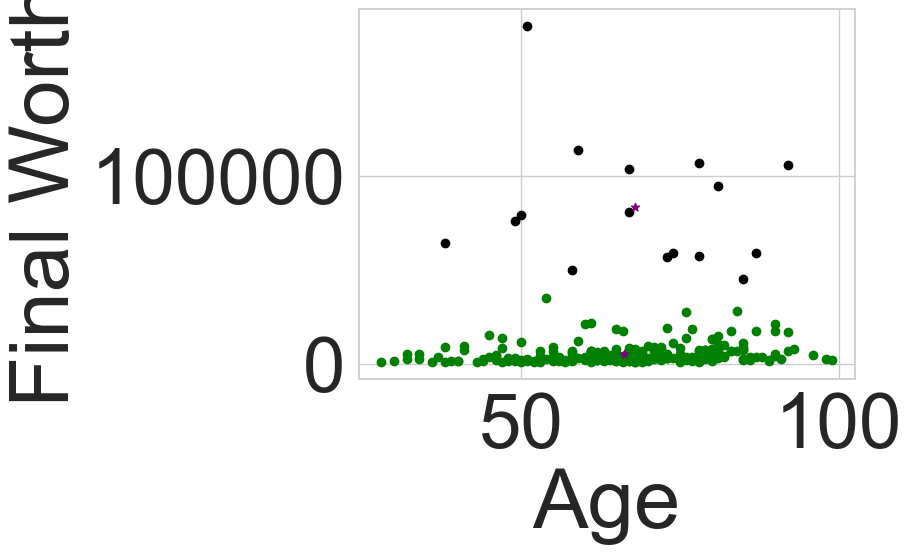

In [146]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
#df3=df[df.cluster==3]

plt.scatter(df0.age,df0['finalWorth'],color='green')
plt.scatter(df1.age,df1['finalWorth'],color='black')
plt.scatter(df2.age,df2['finalWorth'],color='red')
#plt.scatter(df3.age,df3['finalWorth'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Final Worth')
plt.legend
plt.show()

In [147]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['age', 'finalWorth']])
    sse.append(km.inertia_)
sse


[114211131369.6134,
 23599285992.176228,
 12148703960.42315,
 7383682126.52751,
 3503222395.4200783,
 2423381726.424841,
 1345255152.0223832,
 950336503.3041533,
 774013535.4041963]

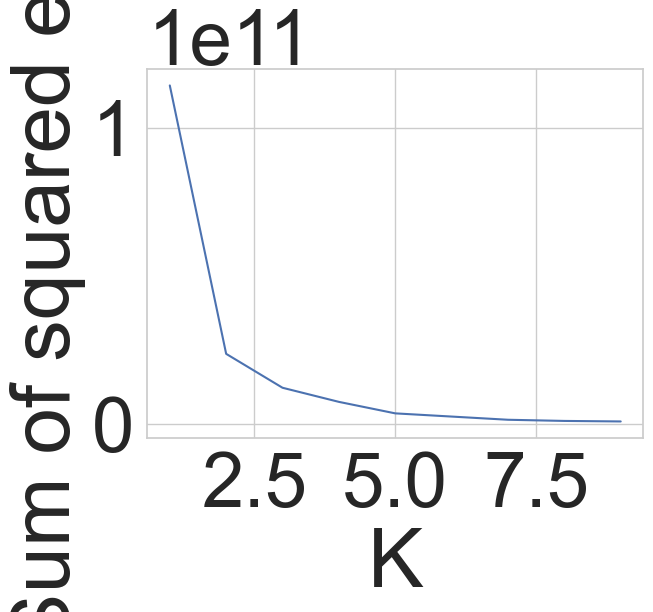

In [148]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)
plt.show()


# Supervised Learning 


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
dataset = pd.read_csv('Billionaires Statistics Dataset.csv')

# Handle missing values
# Fill missing numerical values with their median
for col in dataset.select_dtypes(include=['float64', 'int64']):
    dataset[col].fillna(dataset[col].median(), inplace=True)
# Fill missing categorical values with their mode
for col in dataset.select_dtypes(include=['object']):
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Separate features and target variable
X = dataset.drop(columns='finalWorth')
y = dataset['finalWorth']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}\n")

# Retrieve and display the top factors contributing to net worth
coefficients = pd.Series(lin_reg.coef_, index=X.columns)
sorted_coefficients = coefficients.sort_values(ascending=False)
top_positive = sorted_coefficients.head(10)
top_negative = sorted_coefficients.tail(10)

print(f"Top Positive Contributors:\n{top_positive}\n")
print(f"Top Negative Contributors:\n{top_negative}\n")

Mean Squared Error (MSE): 26362359.52139253
R^2 Score: -0.011481984736055884
Mean Absolute Error (MAE): 3316.087302410676

Top Positive Contributors:
personName_Bernard Arnault & family              31572.564470
lastName_Arnault                                 31572.564470
birthDate_03-05-1949 00:00                       31572.564470
source_LVMH                                      31572.564470
organization_LVMH Moët Hennessy Louis Vuitton    31572.564470
personName_Elon Musk                             24041.471212
organization_Tesla                               24041.471212
birthDate_6/28/1971 0:00                         24041.471212
source_Tesla, SpaceX                             24041.471212
lastName_Musk                                    24041.471212
dtype: float64

Top Negative Contributors:
lastName_Rothschild                -6268.080915
birthDate_01-02-1955 00:00         -6268.080915
personName_Charles Simonyi         -6732.741194
birthDate_09-10-1948 00:00         -6732.74

# Logistic Regression

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

# ReLoad the dataset
dataset = pd.read_csv('Billionaires Statistics Dataset.csv')

# Define target variable based on the 75th percentile of finalWorth (i.e above is 1 and below is 0)
threshold = dataset['finalWorth'].quantile(0.75)
dataset['exponential_growth'] = (dataset['finalWorth'] > threshold).astype(int)

dataset.drop('finalWorth', axis=1, inplace=True)

# Handle missing values
dataset = dataset.dropna()

# Separate features and target variable
X = dataset.drop(columns='exponential_growth')
y = dataset['exponential_growth']

# One-hot encode categorical features rather than convert manually 
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred)
print(report)

# Retrieve and display the top factors contributing to exponential growth
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
sorted_coefficients = coefficients.sort_values(ascending=False)
top_positive = sorted_coefficients.head(10)
top_negative = sorted_coefficients.tail(10)
print("Top Positive Contributors:", top_positive)
print("Top Negative Contributors:", top_negative)



              precision    recall  f1-score   support

           0       0.60      1.00      0.75        43
           1       0.00      0.00      0.00        29

    accuracy                           0.60        72
   macro avg       0.30      0.50      0.37        72
weighted avg       0.36      0.60      0.45        72

Top Positive Contributors: birthDay                  1.303216e-16
age                       1.028035e-16
longitude_country         8.569135e-17
status_U                  6.267462e-18
title_Chairman and CEO    2.147179e-18
state_Oklahoma            1.388209e-18
state_Texas               1.170889e-18
firstName_Jim             1.062779e-18
title_Co-Chairman         1.041157e-18
city_Medina               1.041157e-18
dtype: float64
Top Negative Contributors: tax_revenue_country_country                  -8.594840e-18
total_tax_rate_country                       -3.276783e-17
latitude_country                             -3.320674e-17
life_expectancy_country              